In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
# import Ngl
# import Nio 
# import metpy.calc as mpc
# from metpy.units import units


In [6]:
import warnings
warnings.filterwarnings('ignore')


## Read in data

In [7]:
## Set which coupling timestep to use (in minutes)
# cplTime = 5 
cplTime = 20 


In [8]:

if cplTime==20:
    dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/'

    htgATMfile = dataDir+'FSCAM.T42_T42.testPassAll_to_CLUBB.005.cam.h0.2015-06-01-84585.nc'
    hmgATMfile = dataDir+'FSCAM.T42_T42.testPassAll_to_CLUBB.005hmg.cam.h0.2015-06-01-84585.nc'

    htgLNDfile = dataDir+'FSCAM.T42_T42.testPassAll_to_CLUBB.005.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile = dataDir+'FSCAM.T42_T42.testPassAll_to_CLUBB.005hmg.clm2.h0.2015-06-01-84585.nc'

    noneATMfile = dataDir+'FSCAM.T42_T42.testPassAll_to_CLUBB.005none.cam.h0.2015-06-01-84585.nc'
    
    with xr.open_dataset(noneATMfile, decode_times=True) as noCplDS:
        noCplDS['time'] = noCplDS.indexes['time'].to_datetimeindex()
    
    ## Test prescribing third order moments at the second level 
    htgATMfile_lev2 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_HTG_thirdOrderLev2.001.cam.h0.2015-06-01-84585.nc'
    hmgATMfile_lev2 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_HMG_thirdOrderLev2.001.cam.h0.2015-06-01-84585.nc'
    
    htgLNDfile_lev2 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_HTG_thirdOrderLev2.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile_lev2 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_HMG_thirdOrderLev2.001.clm2.h0.2015-06-01-84585.nc'
    
    with xr.open_dataset(htgATMfile_lev2, decode_times=True) as HTGcamDS_lev2:
        HTGcamDS_lev2['time'] = HTGcamDS_lev2.indexes['time'].to_datetimeindex()
    
    with xr.open_dataset(htgLNDfile_lev2, decode_times=True) as HTGclmDS_lev2:
        HTGclmDS_lev2['time'] = HTGclmDS_lev2.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgATMfile_lev2, decode_times=True) as HMGcamDS_lev2:
        HMGcamDS_lev2['time'] = HMGcamDS_lev2.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgLNDfile_lev2, decode_times=True) as HMGclmDS_lev2:
        HMGclmDS_lev2['time'] = HMGclmDS_lev2.indexes['time'].to_datetimeindex()
        
    ## Test *not* prescribing third order moments at all
    htgATMfile_no3 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_HTG_noThirdOrder.001.cam.h0.2015-06-01-84585.nc'
    hmgATMfile_no3 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_HMG_noThirdOrder.001.cam.h0.2015-06-01-84585.nc'
    
    htgLNDfile_no3 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_HTG_noThirdOrder.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile_no3 = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_HMG_noThirdOrder.001.clm2.h0.2015-06-01-84585.nc'
    
    with xr.open_dataset(htgATMfile_no3, decode_times=True) as HTGcamDS_no3:
        HTGcamDS_no3['time'] = HTGcamDS_no3.indexes['time'].to_datetimeindex()
    
    with xr.open_dataset(htgLNDfile_no3, decode_times=True) as HTGclmDS_no3:
        HTGclmDS_no3['time'] = HTGclmDS_no3.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgATMfile_no3, decode_times=True) as HMGcamDS_no3:
        HMGcamDS_no3['time'] = HMGcamDS_no3.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgLNDfile_no3, decode_times=True) as HMGclmDS_no3:
        HMGclmDS_no3['time'] = HMGclmDS_no3.indexes['time'].to_datetimeindex()
        
        
    ## Test new w* fix (calculate in CLUBBmoments itself)
    htgATMfile_newFix = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_WSTARdefineInCLUBBmoments_HTG.001.cam.h0.2015-06-01-84585.nc'
    hmgATMfile_newFix = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_WSTARdefineInCLUBBmoments_HMG.001.cam.h0.2015-06-01-84585.nc'
    
    htgLNDfile_newFix = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_WSTARdefineInCLUBBmoments_HTG.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile_newFix = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_WSTARdefineInCLUBBmoments_HMG.001.clm2.h0.2015-06-01-84585.nc'
    
    with xr.open_dataset(htgATMfile_newFix, decode_times=True) as HTGcamDS_newFix:
        HTGcamDS_newFix['time'] = HTGcamDS_newFix.indexes['time'].to_datetimeindex()
    
    with xr.open_dataset(htgLNDfile_newFix, decode_times=True) as HTGclmDS_newFix:
        HTGclmDS_newFix['time'] = HTGclmDS_newFix.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgATMfile_newFix, decode_times=True) as HMGcamDS_newFix:
        HMGcamDS_newFix['time'] = HMGcamDS_newFix.indexes['time'].to_datetimeindex()

    with xr.open_dataset(hmgLNDfile_newFix, decode_times=True) as HMGclmDS_newFix:
        HMGclmDS_newFix['time'] = HMGclmDS_newFix.indexes['time'].to_datetimeindex()

        
    
elif cplTime==5:
    dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/5minCoupling/'

    htgATMfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_HTG.001.cam.h0.2015-06-01-84585.nc'
    hmgATMfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_HMG.001.cam.h0.2015-06-01-84585.nc'

    htgLNDfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_HTG.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_HMG.001.clm2.h0.2015-06-01-84585.nc'
    
    
with xr.open_dataset(htgATMfile, decode_times=True) as HTGcamDS:
    HTGcamDS['time'] = HTGcamDS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(htgLNDfile, decode_times=True) as HTGclmDS:
    HTGclmDS['time'] = HTGclmDS.indexes['time'].to_datetimeindex()

with xr.open_dataset(hmgATMfile, decode_times=True) as HMGcamDS:
    HMGcamDS['time'] = HMGcamDS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(hmgLNDfile, decode_times=True) as HMGclmDS:
    HMGclmDS['time'] = HMGclmDS.indexes['time'].to_datetimeindex()
    

In [9]:
## Discard the first day... 
#iTimeStart = np.where(HMGcamDS.time.values >= np.datetime64('2015-06-02'))[0]
iTimeStart = np.where(HMGcamDS.time.values >= np.datetime64('2015-06-03'))[0]
timeArr = np.arange(iTimeStart[0], len(HMGcamDS.time.values))

if cplTime==20:
    noCplDS  = noCplDS.isel(time=timeArr)
    
    HTGcamDS_lev2 = HTGcamDS_lev2.isel(time=timeArr)
    HTGclmDS_lev2 = HTGclmDS_lev2.isel(time=timeArr)

    HMGcamDS_lev2 = HMGcamDS_lev2.isel(time=timeArr)
    HMGclmDS_lev2 = HMGclmDS_lev2.isel(time=timeArr)
    
    
    HTGcamDS_no3 = HTGcamDS_no3.isel(time=timeArr)
    HTGclmDS_no3 = HTGclmDS_no3.isel(time=timeArr)

    HMGcamDS_no3 = HMGcamDS_no3.isel(time=timeArr)
    HMGclmDS_no3 = HMGclmDS_no3.isel(time=timeArr)
        

    HTGcamDS_newFix = HTGcamDS_newFix.isel(time=timeArr)
    HTGclmDS_newFix = HTGclmDS_newFix.isel(time=timeArr)

    HMGcamDS_newFix = HMGcamDS_newFix.isel(time=timeArr)
    HMGclmDS_newFix = HMGclmDS_newFix.isel(time=timeArr)
    
    
HTGcamDS = HTGcamDS.isel(time=timeArr)
HTGclmDS = HTGclmDS.isel(time=timeArr)

HMGcamDS = HMGcamDS.isel(time=timeArr)
HMGclmDS = HMGclmDS.isel(time=timeArr)




Text(0.5, 1.0, 'WPRTP_CLUBB')

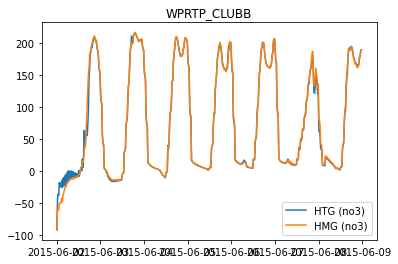

In [8]:
plt.plot(HTGcamDS_no3.time.values, np.squeeze(HTGcamDS_no3.WPRTP_CLUBB.values[:,-1,:,:]), label='HTG (no3)')
plt.plot(HTGcamDS_no3.time.values, np.squeeze(HMGcamDS_no3.WPRTP_CLUBB.values[:,-1,:,:]), label='HMG (no3)')
plt.legend()
plt.title('WPRTP_CLUBB')


Text(0.5, 1.0, 'WPRTP_CLUBB (output from CLM)')

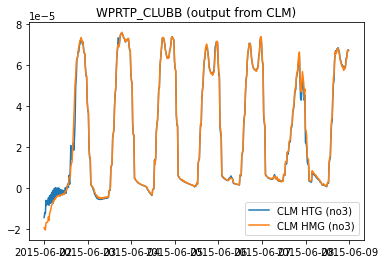

In [9]:
plt.plot(HTGclmDS_no3.time.values, np.squeeze(HTGclmDS_no3.WPQP_CLUBB.values), label='CLM HTG (no3)')
plt.plot(HTGclmDS_no3.time.values, np.squeeze(HMGclmDS_no3.WPQP_CLUBB.values), label='CLM HMG (no3)')
plt.legend()
plt.title('WPRTP_CLUBB (output from CLM)')



Text(0.5, 1.0, 'WPRTP_CLUBB (output from CLM)')

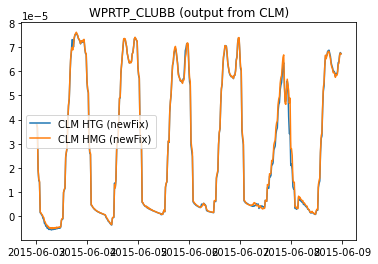

In [10]:
plt.plot(HTGclmDS_newFix.time.values, np.squeeze(HTGclmDS_newFix.WPQP_CLUBB.values), label='CLM HTG (newFix)')
plt.plot(HTGclmDS_newFix.time.values, np.squeeze(HMGclmDS_newFix.WPQP_CLUBB.values), label='CLM HMG (newFix)')
plt.legend()
plt.title('WPRTP_CLUBB (output from CLM)')


In [16]:
np.nanmax(HTGcamDS_newFix.WPRTP_CLUBB.values[:,-1,:,:] - HMGcamDS_newFix.WPRTP_CLUBB.values[:,-1,:,:])

11.780792

Text(0.5, 1.0, 'WPRTP_CLUBB (output from CLM)')

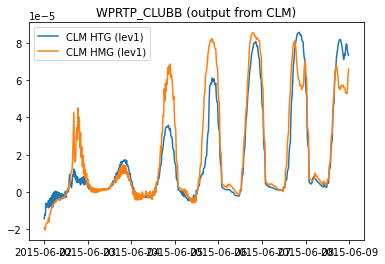

In [15]:
plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HTGclmDS.WPQP_CLUBB.values), label='CLM HTG (lev1)')
plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HMGclmDS.WPQP_CLUBB.values), label='CLM HMG (lev1)')
plt.legend()
plt.title('WPRTP_CLUBB (output from CLM)')




Text(0.5, 1.0, 'SHFLX')

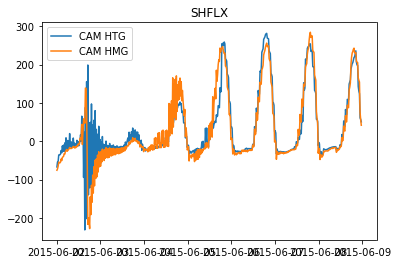

In [26]:
plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HTGcamDS.SHFLX.values), label='CAM HTG')
plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HMGcamDS.SHFLX.values), label='CAM HMG')
plt.legend()
plt.title('SHFLX')


Text(0.5, 1.0, 'SHFLX')

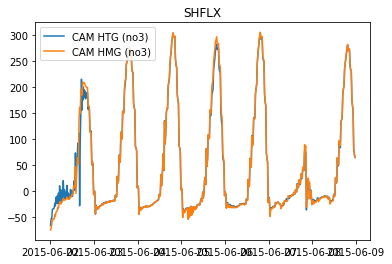

In [25]:
plt.plot(HTGclmDS_no3.time.values, np.squeeze(HTGcamDS_no3.SHFLX.values), label='CAM HTG (no3)')
plt.plot(HTGclmDS_no3.time.values, np.squeeze(HMGcamDS_no3.SHFLX.values), label='CAM HMG (no3)')

# plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HTGcamDS_lev2.SHFLX.values), label='CAM HTG (lev2)')
# plt.plot(HTGclmDS_lev2.time.values, np.squeeze(HMGcamDS_lev2.SHFLX.values), label='CAM HMG (lev2)')


plt.legend()
plt.title('SHFLX')



Text(0.5, 1.0, 'FSH_TO_COUPLER (output from CLM)')

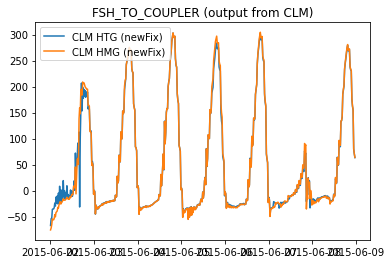

In [36]:
plt.plot(HTGclmDS_newFix.time.values, np.squeeze(HTGclmDS_newFix.FSH_TO_COUPLER.values), label='CLM HTG (newFix)')
plt.plot(HTGclmDS_newFix.time.values, np.squeeze(HMGclmDS_newFix.FSH_TO_COUPLER.values), label='CLM HMG (newFix)')
plt.legend()
plt.title('FSH_TO_COUPLER (output from CLM)')


## Make some plots for comparison

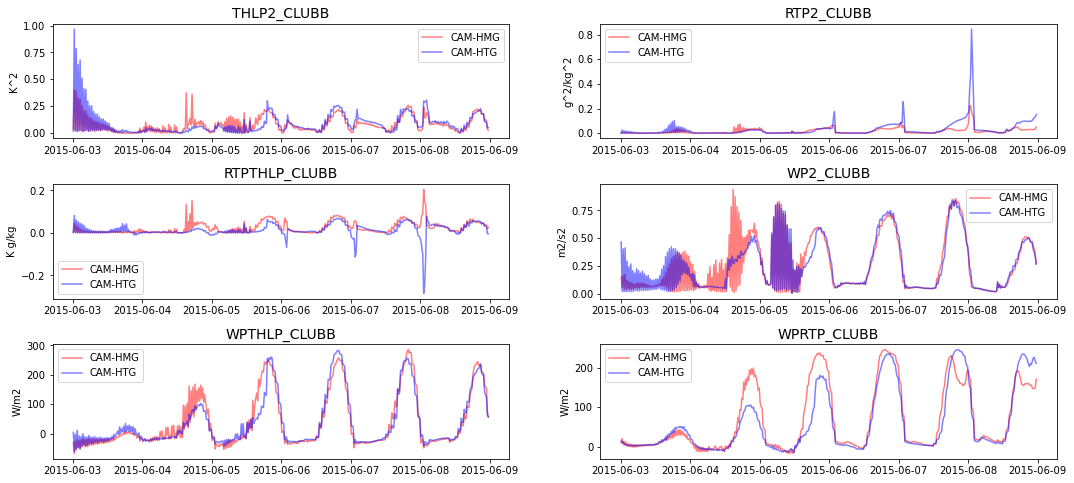

In [7]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','RTPTHLP_CLUBB','WP2_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB'])

for iVar in range(6):
#     if cplTime==20: 
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       'k-', label='CAM-NoCpl')
#         axs[iVar].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='r', label='CAM-HMG (no3)')
#         axs[iVar].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='b', alpha=0.8, label='CAM-HTG (no3)')
        
#         axs[iVar].plot(HMGcamDS_newFix['time'].values, np.squeeze(HMGcamDS_newFix[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='orange', label='CAM-HMG (newFix)')
#         axs[iVar].plot(HTGcamDS_newFix['time'].values, np.squeeze(HTGcamDS_newFix[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='green', alpha=0.8, label='CAM-HTG (newFix)')

    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


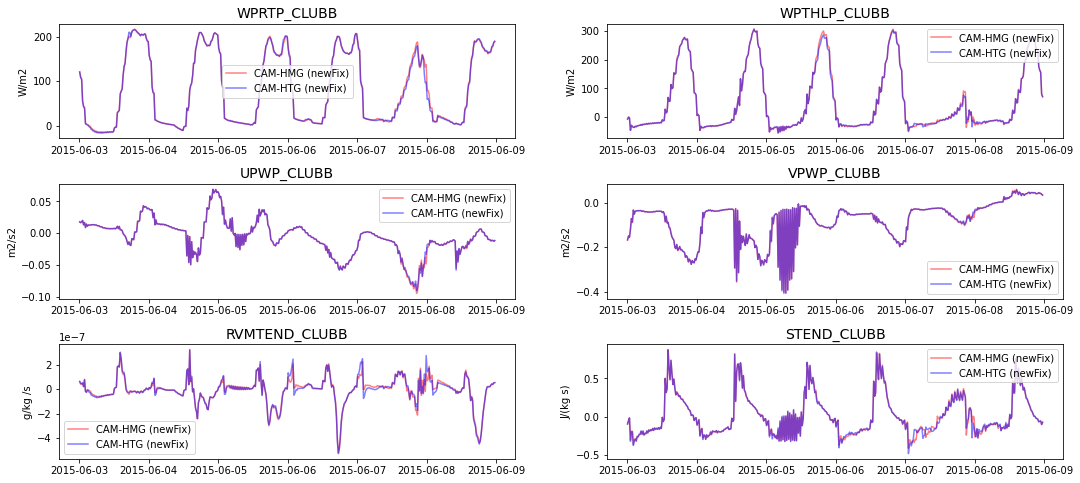

In [15]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPRTP_CLUBB','WPTHLP_CLUBB','UPWP_CLUBB','VPWP_CLUBB','RVMTEND_CLUBB','STEND_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
#     if cplTime==20:
# #         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-1,:,:]),
# #                       'k-', label='CAM-NoCpl')
#         axs[iVar].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='orange', alpha=0.5, label='CAM-HMG (no3)')
#         axs[iVar].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3[ATM_varNames[iVar]].values[:,-1,:,:]),
#                       '-',color='green', alpha=0.5, label='CAM-HTG (no3)')
        
#     axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'r-', alpha=0.5, label='CAM-HMG')
#     axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'b-', alpha=0.5, label='CAM-HTG')
    
    axs[iVar].plot(HMGcamDS_newFix['time'].values, np.squeeze(HMGcamDS_newFix[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG (newFix)')
    axs[iVar].plot(HTGcamDS_newFix['time'].values, np.squeeze(HTGcamDS_newFix[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG (newFix)')
    
#     axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   '-', color='orange', alpha=0.5, label='CAM-HMG (lev2)')
#     axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   '-',color='cyan', alpha=0.5, label='CAM-HTG (lev2)')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


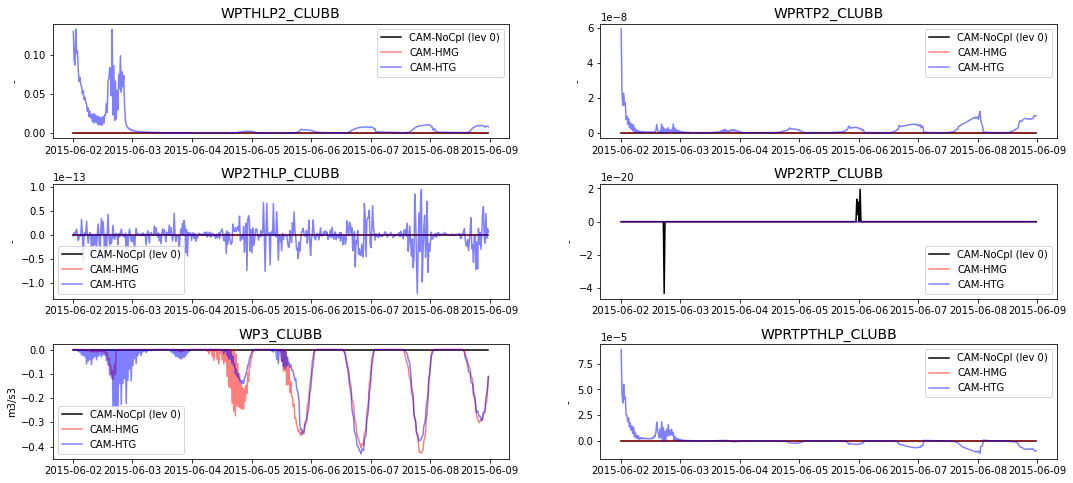

In [8]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    if cplTime==20:
        axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                      'k-', label='CAM-NoCpl (lev 0)')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


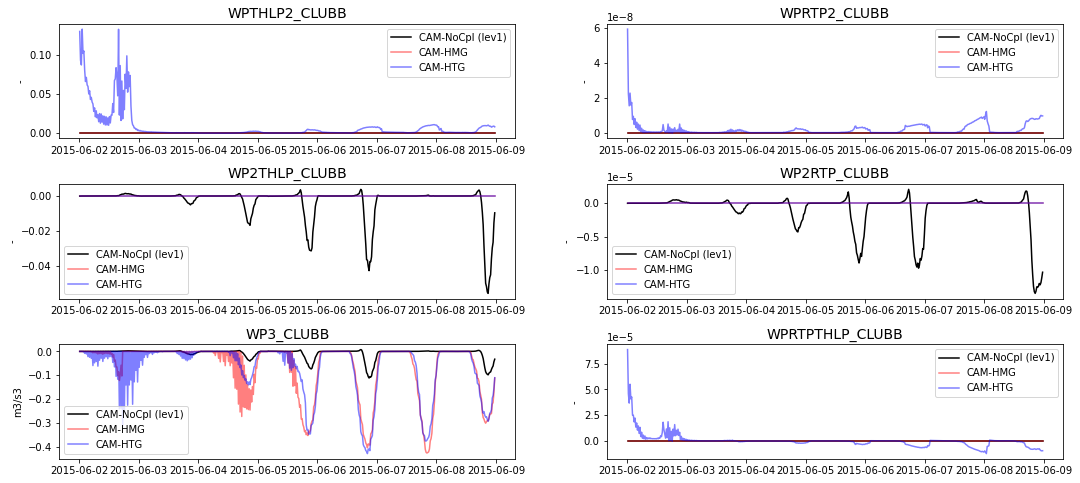

In [9]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    if cplTime==20:
        axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-2,:,:]),
                      'k-', label='CAM-NoCpl (lev1)')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()



**What about if we actually prescribe the moments to be at level 2 if they're third order?**

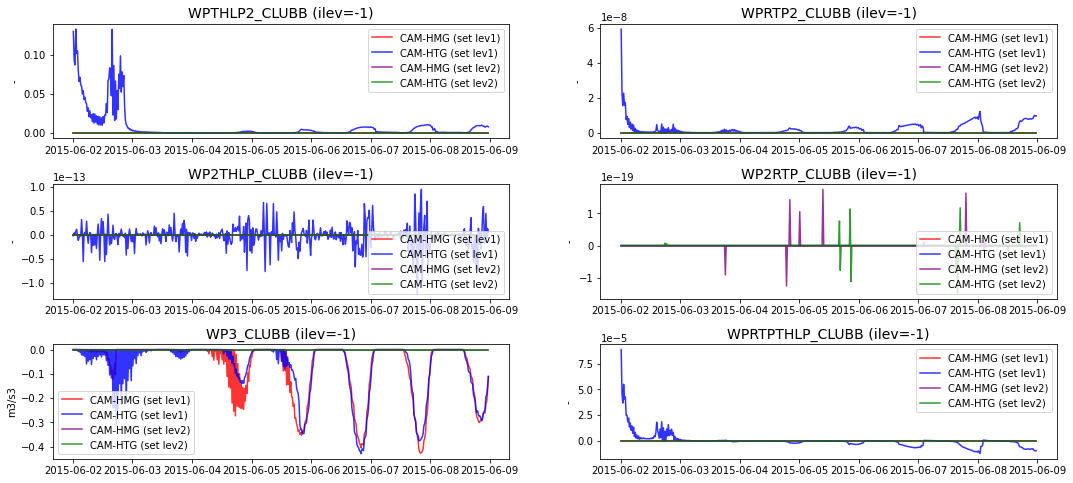

In [103]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
#     if cplTime==20:
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-2,:,:]),
#                       'k-', label='CAM-NoCpl (lev1)')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.8, label='CAM-HMG (set lev1)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.8, label='CAM-HTG (set lev1)')
    
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
                  '-', color='purple', alpha=0.8, label='CAM-HMG (set lev2)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
                  '-',color='green', alpha=0.8, label='CAM-HTG (set lev2)')

    axs[iVar].set_title(ATM_varNames[iVar]+' (ilev=-1)',fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()




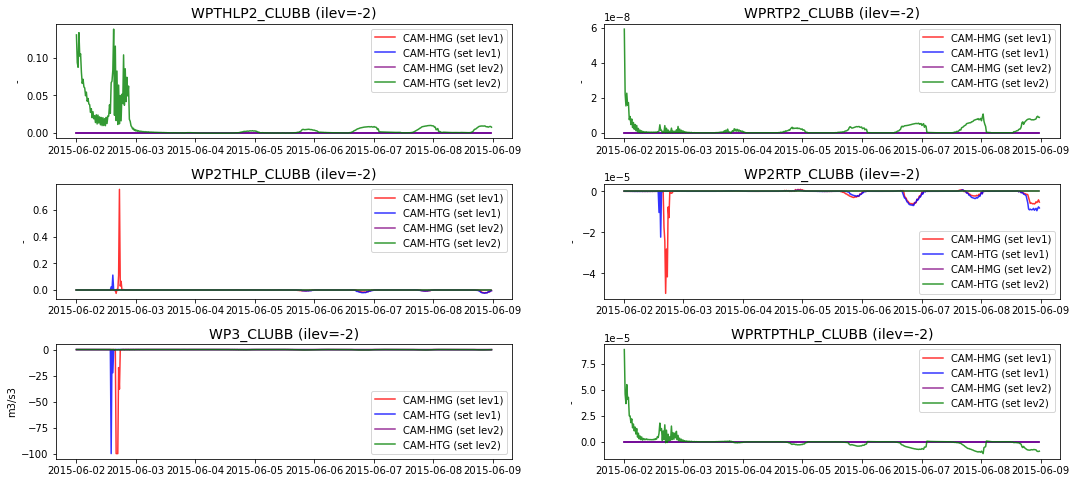

In [104]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
#     if cplTime==20:
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values[:,-2,:,:]),
#                       'k-', label='CAM-NoCpl (lev1)')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-2,:,:]),
                  'r-', alpha=0.8, label='CAM-HMG (set lev1)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-2,:,:]),
                  'b-', alpha=0.8, label='CAM-HTG (set lev1)')
    
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS_lev2[ATM_varNames[iVar]].values[:,-2,:,:]),
                  '-', color='purple', alpha=0.8, label='CAM-HMG (set lev2)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS_lev2[ATM_varNames[iVar]].values[:,-2,:,:]),
                  '-',color='green', alpha=0.8, label='CAM-HTG (set lev2)')

    axs[iVar].set_title(ATM_varNames[iVar]+' (ilev=-2)',fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()





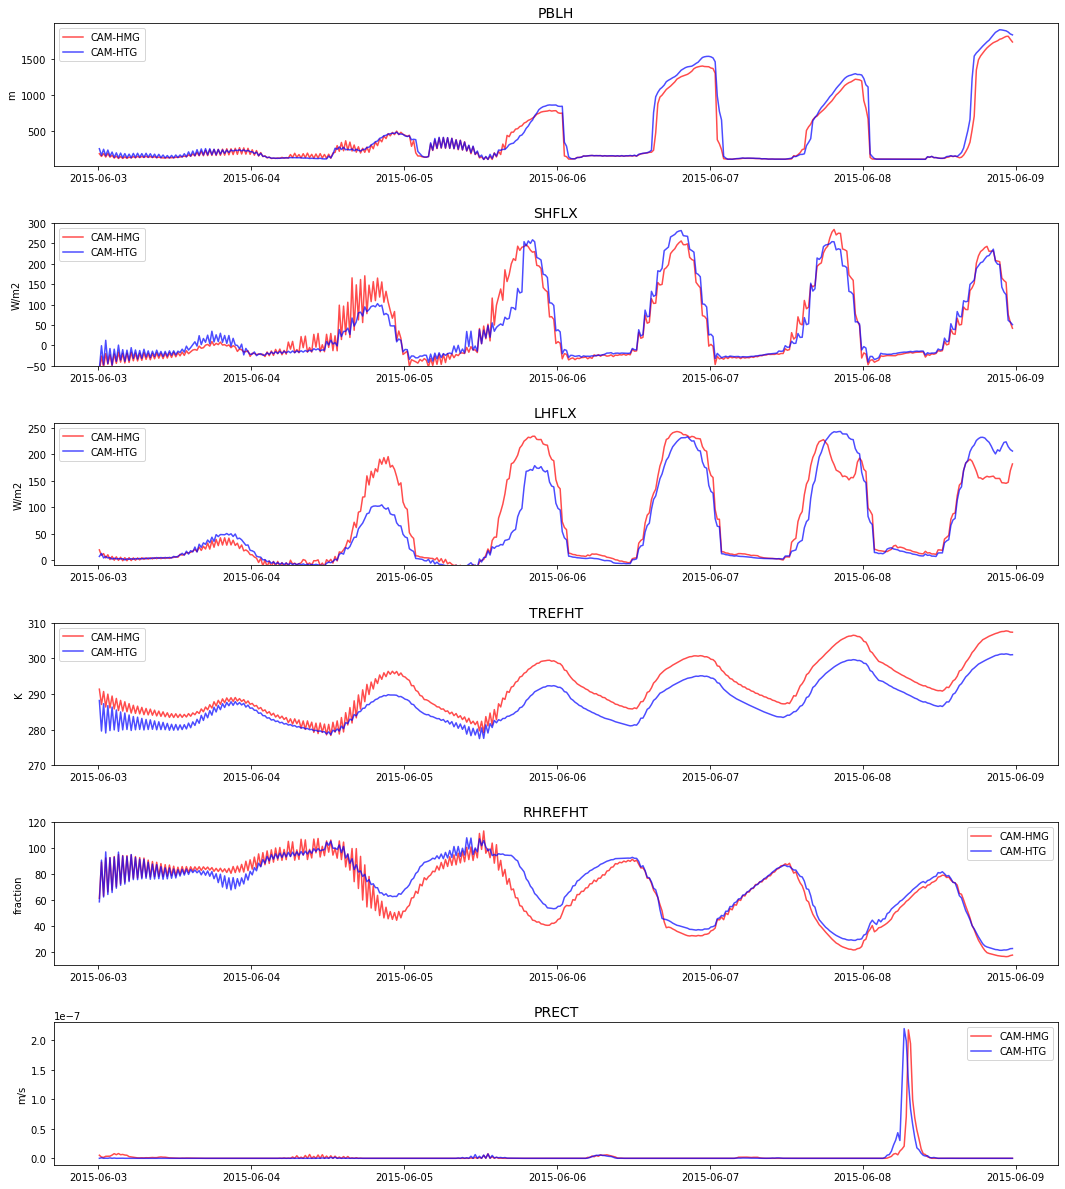

In [9]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
#     axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,8,29)])
#     axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])



Text(0.5, 1.0, 'Q')

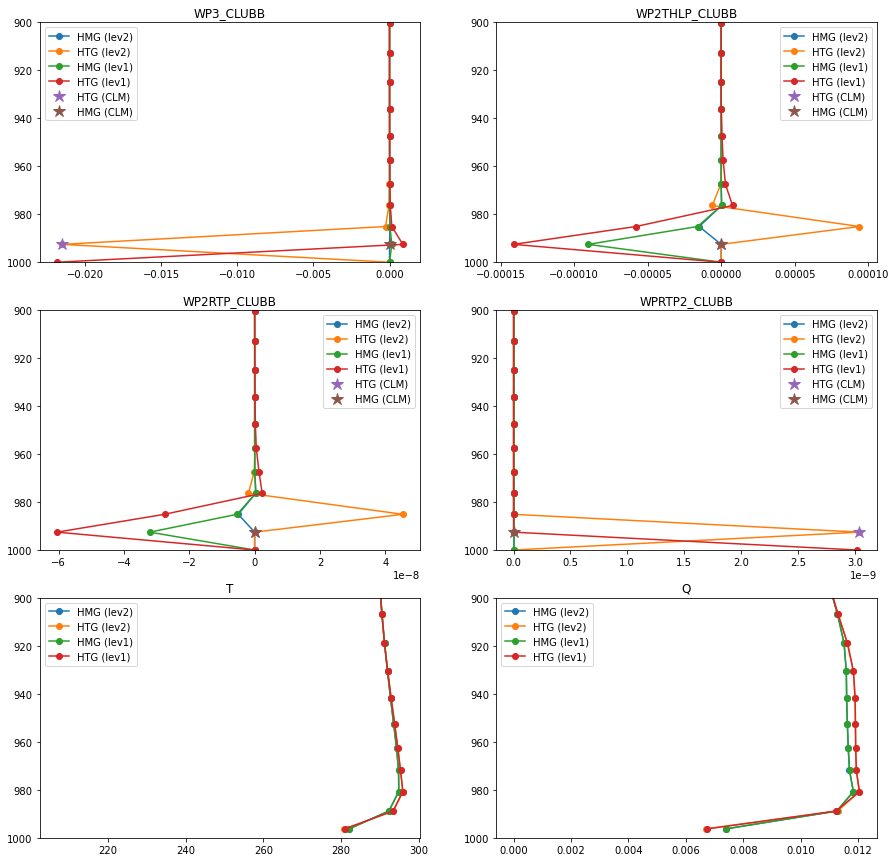

In [80]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), 
                        facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(HMGcamDS_lev2.WP3_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev2)')
axs[0].plot(HTGcamDS_lev2.WP3_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev2)')
axs[0].plot(HMGcamDS.WP3_CLUBB.values[10,:,0,0], HMGcamDS.ilev.values,'o-', label='HMG (lev1)')
axs[0].plot(HTGcamDS.WP3_CLUBB.values[10,:,0,0], HTGcamDS.ilev.values,'o-', label='HTG (lev1)')
axs[0].plot(HTGclmDS_lev2.WP3_CLUBB.values[10-1], HTGcamDS.ilev.values[-2],'*',markersize=12,label='HTG (CLM)')
axs[0].plot(HMGclmDS_lev2.WP3_CLUBB.values[10-1], HMGcamDS.ilev.values[-2],'*',markersize=12,label='HMG (CLM)')
axs[0].legend()
axs[0].invert_yaxis()
axs[0].set_ylim([1000,900])
axs[0].set_title('WP3_CLUBB')

axs[1].plot(HMGcamDS_lev2.WP2THLP_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev2)')
axs[1].plot(HTGcamDS_lev2.WP2THLP_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev2)')
axs[1].plot(HMGcamDS.WP2THLP_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev1)')
axs[1].plot(HTGcamDS.WP2THLP_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev1)')
axs[1].plot(HTGclmDS_lev2.WP2THLP_CLUBB.values[10-1], HTGcamDS.ilev.values[-2],'*',markersize=12,label='HTG (CLM)')
axs[1].plot(HMGclmDS_lev2.WP2THLP_CLUBB.values[10-1], HMGcamDS.ilev.values[-2],'*',markersize=12,label='HMG (CLM)')
axs[1].legend()
axs[1].invert_yaxis()
axs[1].set_ylim([1000,900])
axs[1].set_title('WP2THLP_CLUBB')


axs[2].plot(HMGcamDS_lev2.WP2RTP_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev2)')
axs[2].plot(HTGcamDS_lev2.WP2RTP_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev2)')
axs[2].plot(HMGcamDS.WP2RTP_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev1)')
axs[2].plot(HTGcamDS.WP2RTP_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev1)')
axs[2].plot(HTGclmDS_lev2.WP2QP_CLUBB.values[10-1], HTGcamDS.ilev.values[-2],'*',markersize=12,label='HTG (CLM)')
axs[2].plot(HMGclmDS_lev2.WP2QP_CLUBB.values[10-1], HMGcamDS.ilev.values[-2],'*',markersize=12,label='HMG (CLM)')
axs[2].legend()
axs[2].invert_yaxis()
axs[2].set_ylim([1000,900])
axs[2].set_title('WP2RTP_CLUBB')

axs[3].plot(HMGcamDS_lev2.WPRTP2_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev2)')
axs[3].plot(HTGcamDS_lev2.WPRTP2_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev2)')
axs[3].plot(HMGcamDS.WPRTP2_CLUBB.values[10,:,0,0], HMGcamDS_lev2.ilev.values,'o-', label='HMG (lev1)')
axs[3].plot(HTGcamDS.WPRTP2_CLUBB.values[10,:,0,0], HTGcamDS_lev2.ilev.values,'o-', label='HTG (lev1)')
axs[3].plot(HTGclmDS_lev2.WPQP2_CLUBB.values[10-1], HTGcamDS.ilev.values[-2],'*',markersize=12,label='HTG (CLM)')
axs[3].plot(HMGclmDS_lev2.WPQP2_CLUBB.values[10-1], HMGcamDS.ilev.values[-2],'*',markersize=12,label='HMG (CLM)')
axs[3].legend()
axs[3].invert_yaxis()
axs[3].set_ylim([1000,900])
axs[3].set_title('WPRTP2_CLUBB')

axs[4].plot(HMGcamDS_lev2.T.values[10,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (lev2)')
axs[4].plot(HTGcamDS_lev2.T.values[10,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (lev2)')
axs[4].plot(HMGcamDS.T.values[10,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (lev1)')
axs[4].plot(HTGcamDS.T.values[10,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (lev1)')
axs[4].legend()
axs[4].invert_yaxis()
axs[4].set_ylim([1000,900])
axs[4].set_title('T')

axs[5].plot(HMGcamDS_lev2.Q.values[10,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (lev2)')
axs[5].plot(HTGcamDS_lev2.Q.values[10,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (lev2)')
axs[5].plot(HMGcamDS.Q.values[10,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (lev1)')
axs[5].plot(HTGcamDS.Q.values[10,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (lev1)')
axs[5].legend()
axs[5].invert_yaxis()
axs[5].set_ylim([1000,900])
axs[5].set_title('Q')


In [30]:
# days = np.asarray([31,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,23,24,25,26,27,28,29,30,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,23,24,25,26,27,28,29,30,31])
# months = np.asarray([5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7])

# len(months)

64

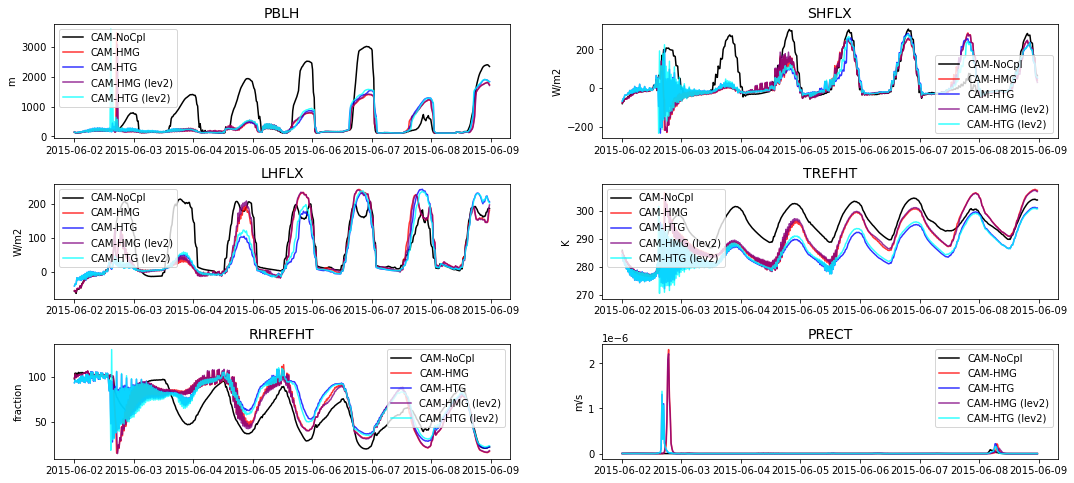

In [42]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    if cplTime==20:
        axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values),
                      'k-', label='CAM-NoCpl')
        
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.8, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.8, label='CAM-HTG')

    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS_lev2[ATM_varNames[iVar]].values),
                  '-', color='purple', alpha=0.8, label='CAM-HMG (lev2)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS_lev2[ATM_varNames[iVar]].values),
                  '-',color='cyan', alpha=0.8, label='CAM-HTG (lev2)')
    
    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


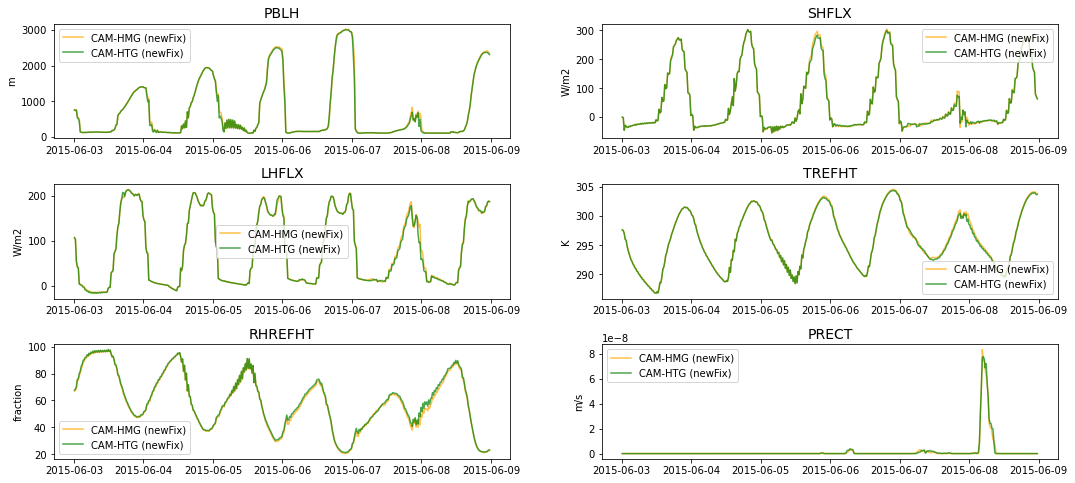

In [27]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])

for iVar in range(6):
    if cplTime==20: 
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values),
#                       'k-', label='CAM-NoCpl')
        axs[iVar].plot(HMGcamDS_newFix['time'].values, np.squeeze(HMGcamDS_newFix[ATM_varNames[iVar]].values),
                      '-',color='orange', alpha=0.7, label='CAM-HMG (newFix)')
        axs[iVar].plot(HTGcamDS_newFix['time'].values, np.squeeze(HTGcamDS_newFix[ATM_varNames[iVar]].values),
                      '-',color='green', alpha=0.7, label='CAM-HTG (newFix)')

#     axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'r-', alpha=0.5, label='CAM-HMG')
#     axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()




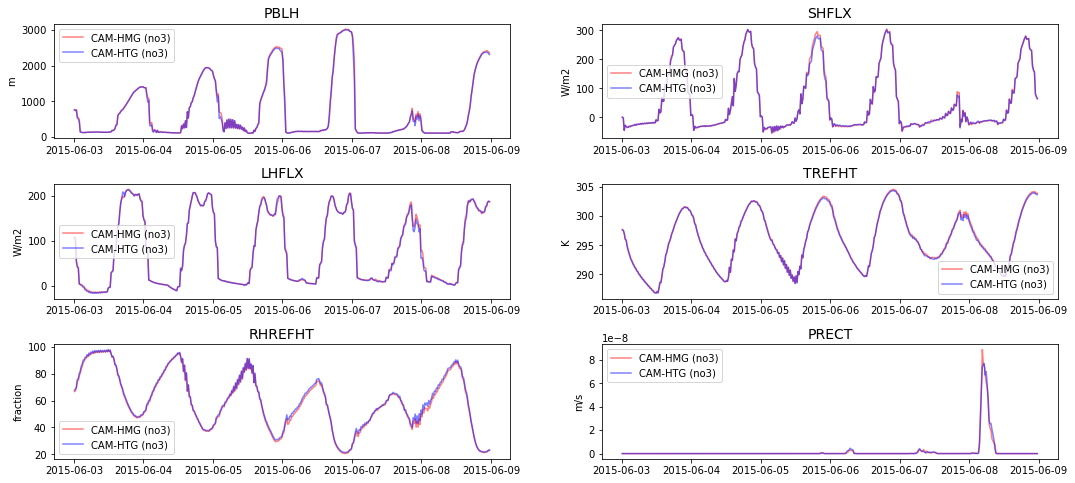

In [22]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])

for iVar in range(6):
    if cplTime==20: 
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values),
#                       'k-', label='CAM-NoCpl')
        axs[iVar].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3[ATM_varNames[iVar]].values),
                      '-',color='r', alpha=0.5, label='CAM-HMG (no3)')
        axs[iVar].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3[ATM_varNames[iVar]].values),
                      '-',color='b', alpha=0.5, label='CAM-HTG (no3)')

#     axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'r-', alpha=0.5, label='CAM-HMG')
#     axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()



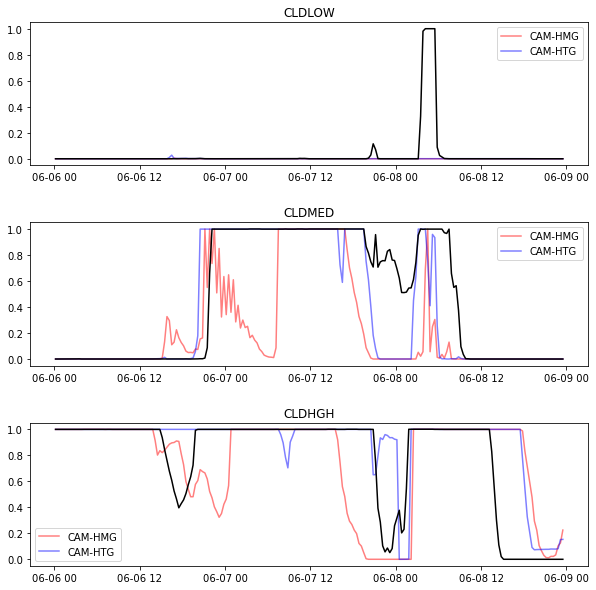

In [11]:
fig,axs = plt.subplots(3,1, figsize=(10,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDLOW.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[0].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDLOW.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[0].legend()
axs[0].set_title('CLDLOW')

axs[1].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDMED.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[1].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDMED.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[1].legend()
axs[1].set_title('CLDMED')

axs[2].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDHGH.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[2].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDHGH.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[2].legend()
axs[2].set_title('CLDHGH')

if cplTime==20:
    axs[0].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDLOW.values), 'k-', label='CAM-NoCpl')
    axs[1].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDMED.values), 'k-', label='CAM-NoCpl')
    axs[2].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDHGH.values), 'k-', label='CAM-NoCpl')
    

Text(0.5, 1.0, 'CLDHGH')

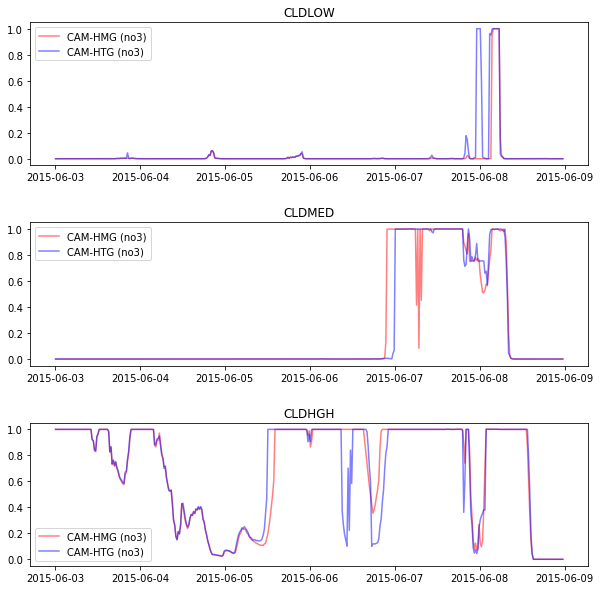

In [21]:
fig,axs = plt.subplots(3,1, figsize=(10,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3.CLDLOW.values), 'r-', alpha=0.5, label='CAM-HMG (no3)')
axs[0].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3.CLDLOW.values), 'b-', alpha=0.5, label='CAM-HTG (no3)')
axs[0].legend()
axs[0].set_title('CLDLOW')

axs[1].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3.CLDMED.values), 'r-', alpha=0.5, label='CAM-HMG (no3)')
axs[1].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3.CLDMED.values), 'b-', alpha=0.5, label='CAM-HTG (no3)')
axs[1].legend()
axs[1].set_title('CLDMED')

axs[2].plot(HMGcamDS_no3['time'].values, np.squeeze(HMGcamDS_no3.CLDHGH.values), 'r-', alpha=0.5, label='CAM-HMG (no3)')
axs[2].plot(HTGcamDS_no3['time'].values, np.squeeze(HTGcamDS_no3.CLDHGH.values), 'b-', alpha=0.5, label='CAM-HTG (no3)')
axs[2].legend()
axs[2].set_title('CLDHGH')

# if cplTime==20:
#     axs[0].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDLOW.values), 'k-', label='CAM-NoCpl')
#     axs[1].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDMED.values), 'k-', label='CAM-NoCpl')
#     axs[2].plot(noCplDS['time'].values, np.squeeze(noCplDS.CLDHGH.values), 'k-', label='CAM-NoCpl')
    

In [45]:
HMGcamDS_no3.time.values[30]

numpy.datetime64('2015-06-03T10:09:45.000000000')

(285.0, 295.0)

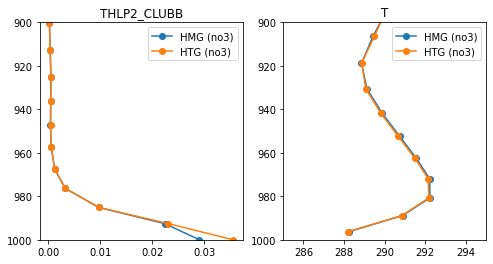

In [47]:
fig, axs = plt.subplots(1,2, figsize=(8, 4), 
                        facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(HMGcamDS_no3.THLP2_CLUBB.values[30,:,0,0], HMGcamDS_no3.ilev.values,'o-', label='HMG (no3)')
axs[0].plot(HTGcamDS_no3.THLP2_CLUBB.values[30,:,0,0], HTGcamDS_no3.ilev.values,'o-', label='HTG (no3)')
axs[0].legend()
axs[0].invert_yaxis()
axs[0].set_ylim([1000,900])
axs[0].set_title('THLP2_CLUBB')

axs[1].plot(HMGcamDS_no3.T.values[30,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (no3)')
axs[1].plot(HTGcamDS_no3.T.values[30,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (no3)')
axs[1].legend()
axs[1].invert_yaxis()
axs[1].set_ylim([1000,900])
axs[1].set_title('T')
axs[1].set_xlim([285,295])


(0.01, 0.012)

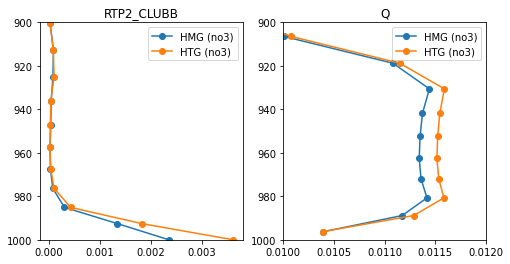

In [49]:
fig, axs = plt.subplots(1,2, figsize=(8, 4), 
                        facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(HMGcamDS_no3.RTP2_CLUBB.values[30,:,0,0], HMGcamDS_no3.ilev.values,'o-', label='HMG (no3)')
axs[0].plot(HTGcamDS_no3.RTP2_CLUBB.values[30,:,0,0], HTGcamDS_no3.ilev.values,'o-', label='HTG (no3)')
axs[0].legend()
axs[0].invert_yaxis()
axs[0].set_ylim([1000,900])
axs[0].set_title('RTP2_CLUBB')

axs[1].plot(HMGcamDS_no3.Q.values[30,:,0,0], HMGcamDS_lev2.lev.values,'o-', label='HMG (no3)')
axs[1].plot(HTGcamDS_no3.Q.values[30,:,0,0], HTGcamDS_lev2.lev.values,'o-', label='HTG (no3)')
axs[1].legend()
axs[1].invert_yaxis()
axs[1].set_ylim([1000,900])
axs[1].set_title('Q')
axs[1].set_xlim([0.010,0.012])



### Plot for CAM7 report? 

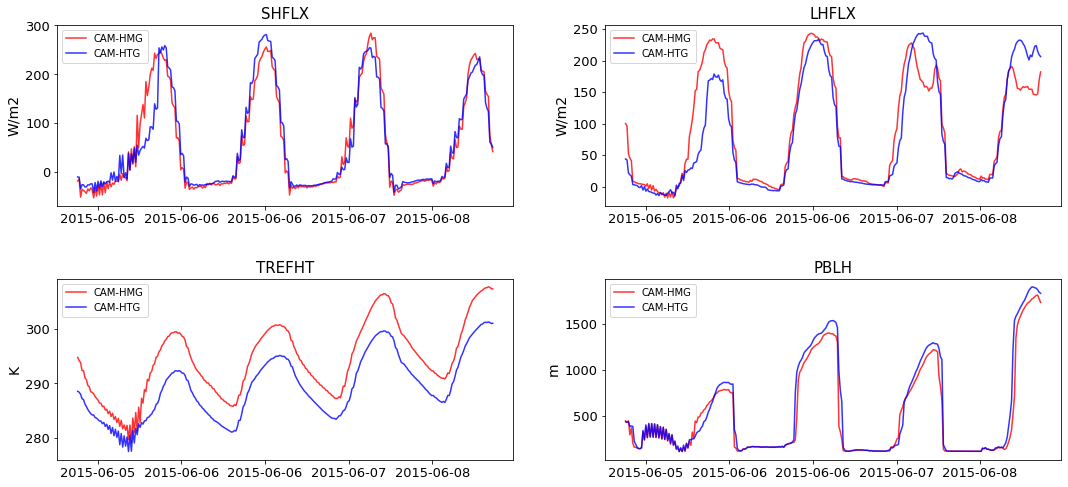

In [27]:
fig,axs = plt.subplots(2,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['SHFLX','LHFLX','TREFHT','PBLH'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(4):
#     if cplTime==20:
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values),
#                       'k-', label='CAM-NoCpl')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.8, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.8, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=15)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units,fontsize=14)
    axs[iVar].legend()

    axs[iVar].tick_params(axis='both', which='major', labelsize=13)
    axs[iVar].xaxis.set_major_locator(plt.MaxNLocator(6))

## Scratch plots

In [48]:
HMGclmDS['time'].values[10:15]

array(['2015-06-03T02:49:44.995422000', '2015-06-03T03:09:45.001144000',
       '2015-06-03T03:29:44.996567000', '2015-06-03T03:49:45.002289000',
       '2015-06-03T04:09:44.997711000'], dtype='datetime64[ns]')

Text(0.5, 1.0, 'WP2THLP_CLUBB')

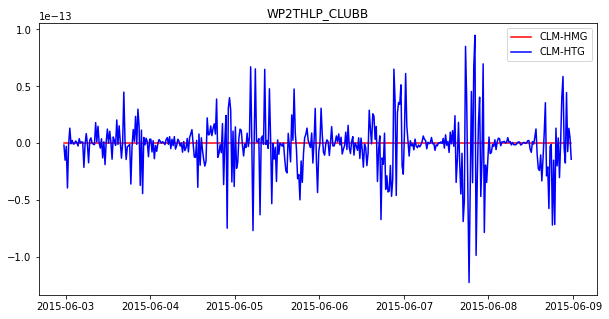

In [24]:
fig,axs = plt.subplots(1,1, figsize=(10,5))

axs.plot(HMGclmDS['time'].values, HMGclmDS.WP2THLP_CLUBB.values, 'r-', label='CLM-HMG')
axs.plot(HTGclmDS['time'].values, HTGclmDS.WP2THLP_CLUBB.values, 'b-', label='CLM-HTG')

axs.legend()
axs.set_title('WP2THLP_CLUBB')


## *CAREFULLY* analyze impact of adding/removing prescribed moments

In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
# import Ngl
# import Nio 
# import metpy.calc as mpc
# from metpy.units import units


<b>Test 1:</b>
* Only prescribe w'2, thl'2, rt'2, and thl'rt' 
* Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in *FluxMods 

In [14]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

In [15]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


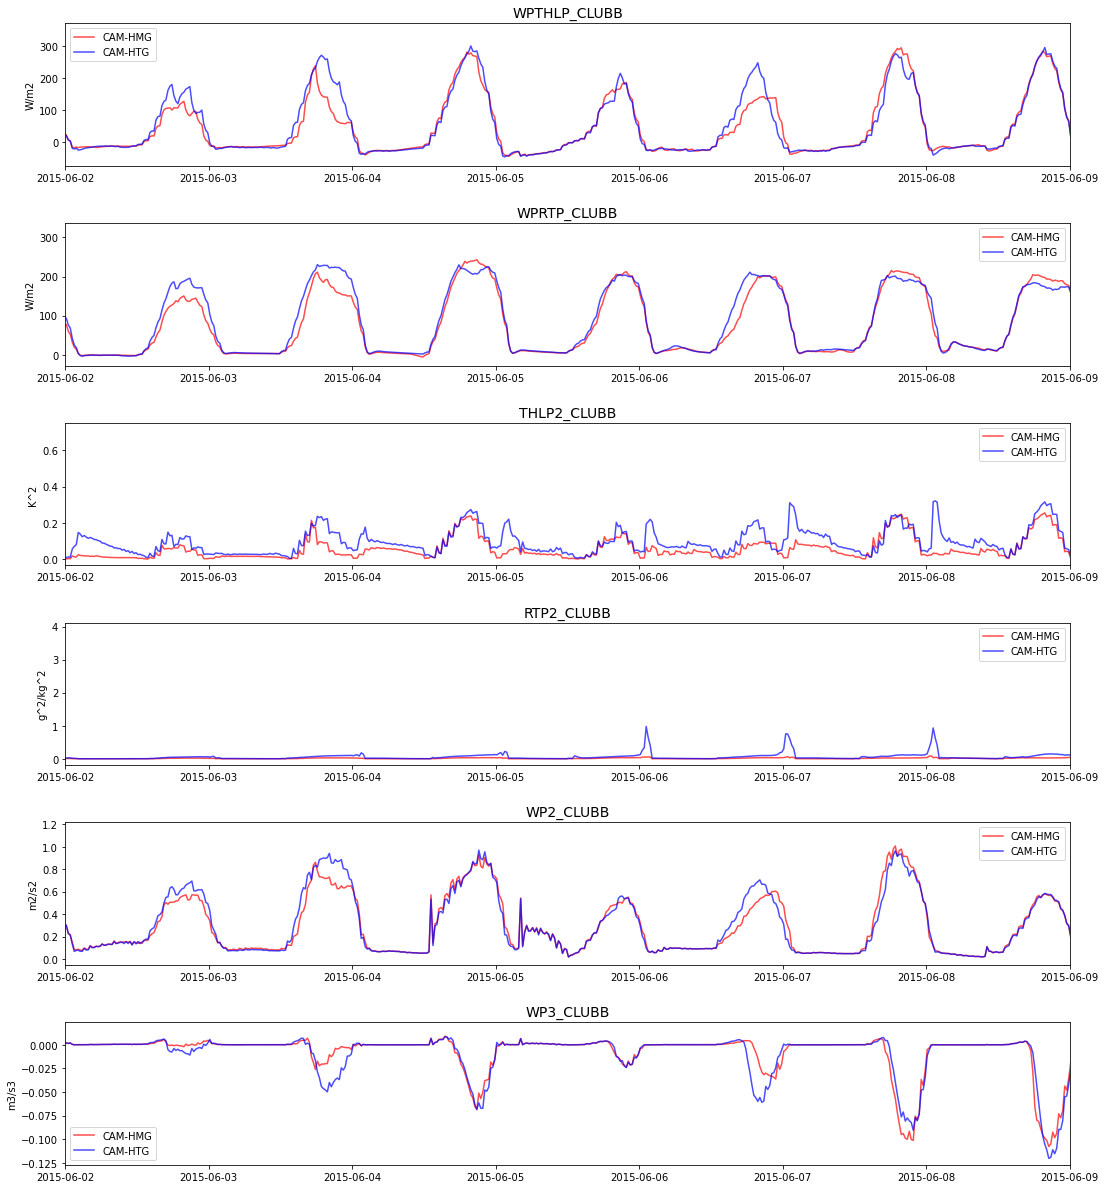

In [16]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])


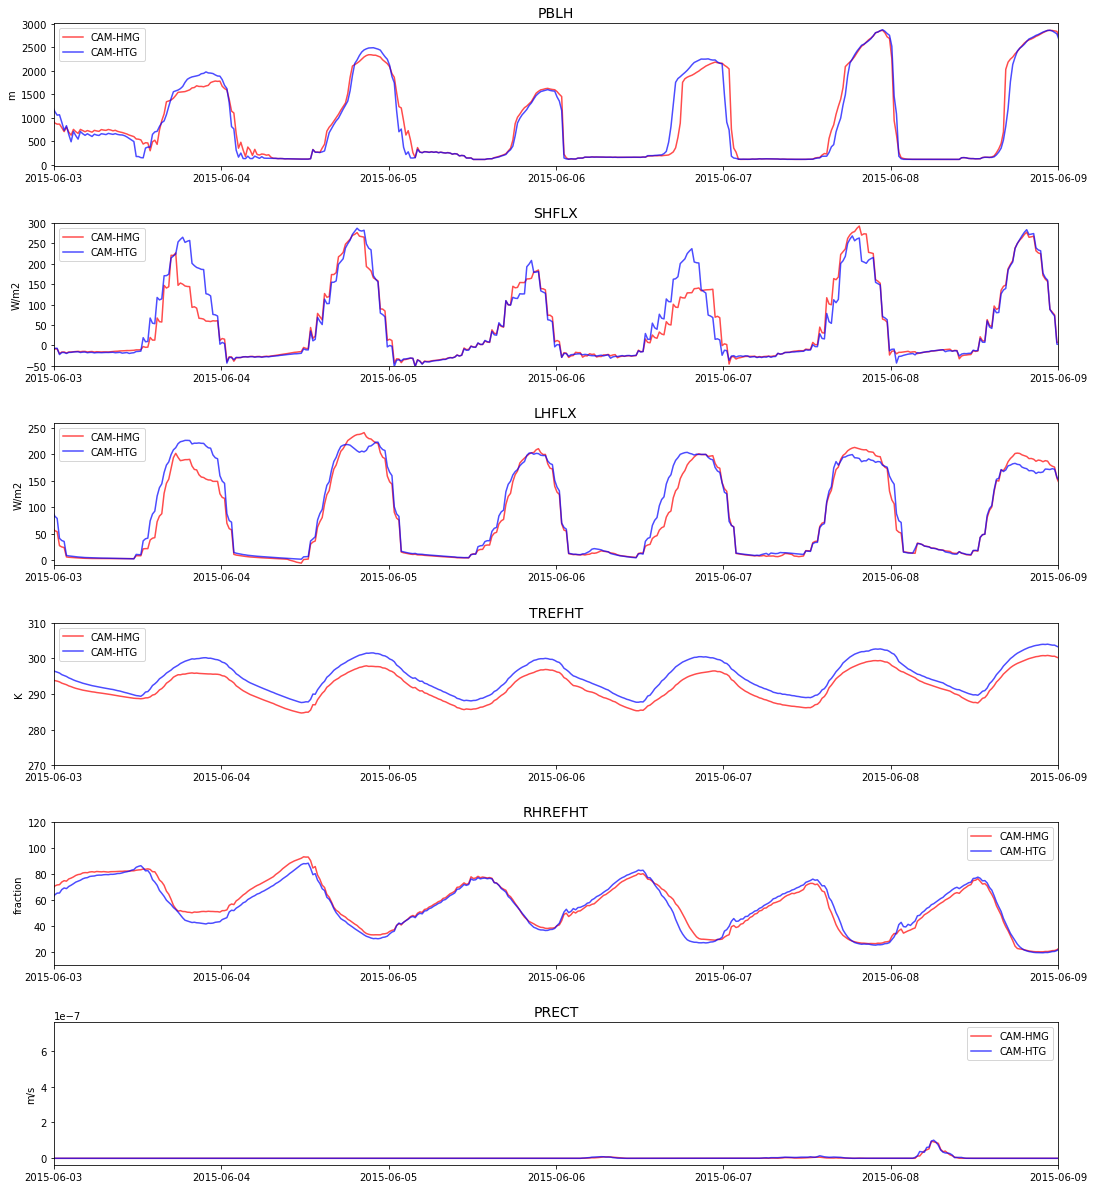

In [17]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])


<b>Test 2:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Now also prescribe w'thl' and w'rt' in clubb_intr.f90
* Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in *FluxMods 

In [3]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2RtpthlpWpthlpWprtp_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2RtpthlpWpthlpWprtp_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [4]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


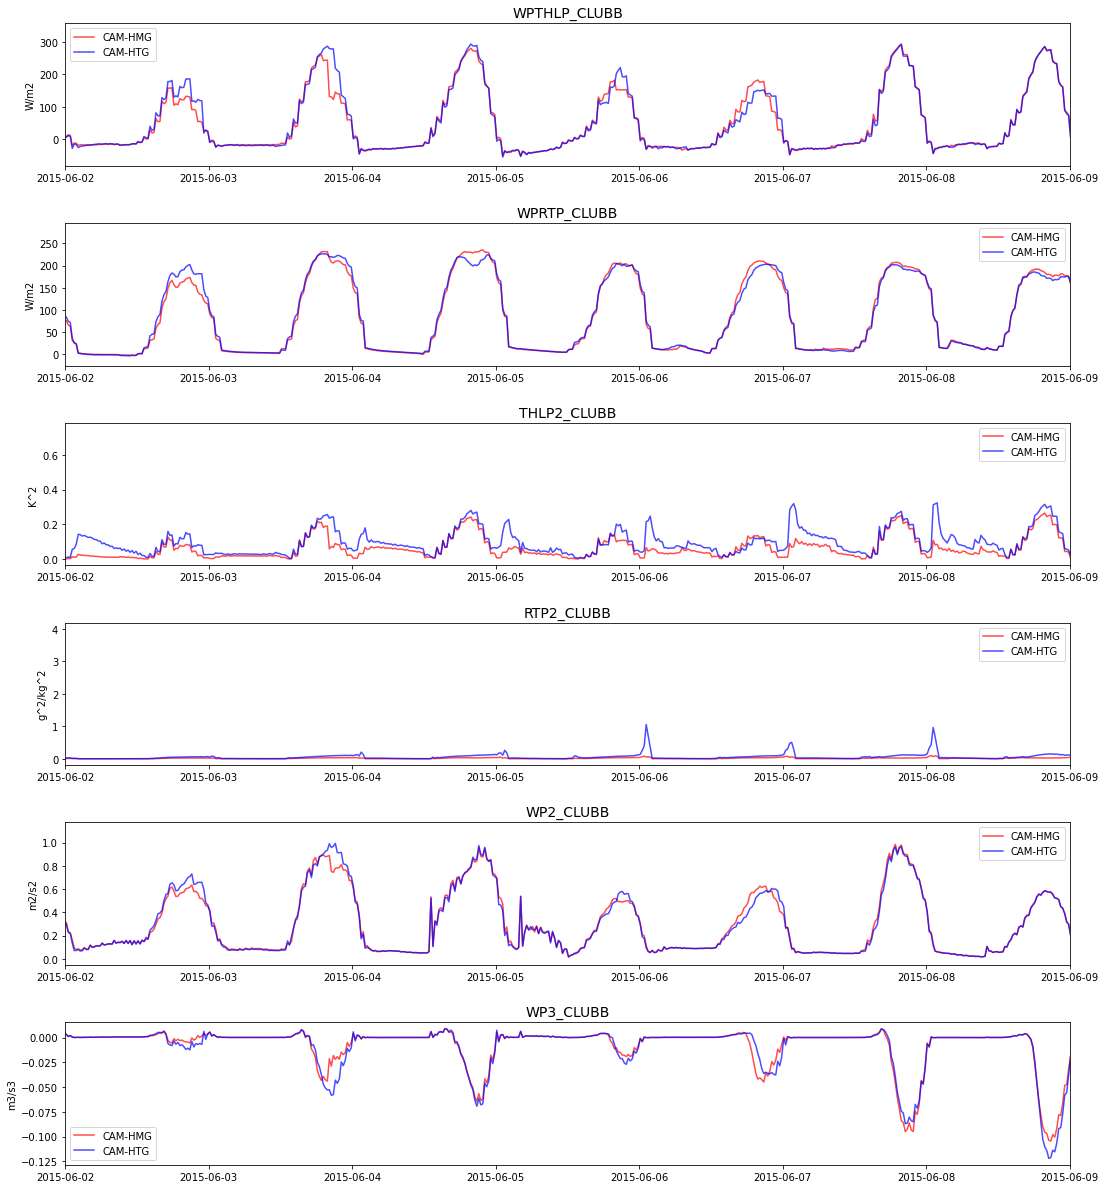

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])


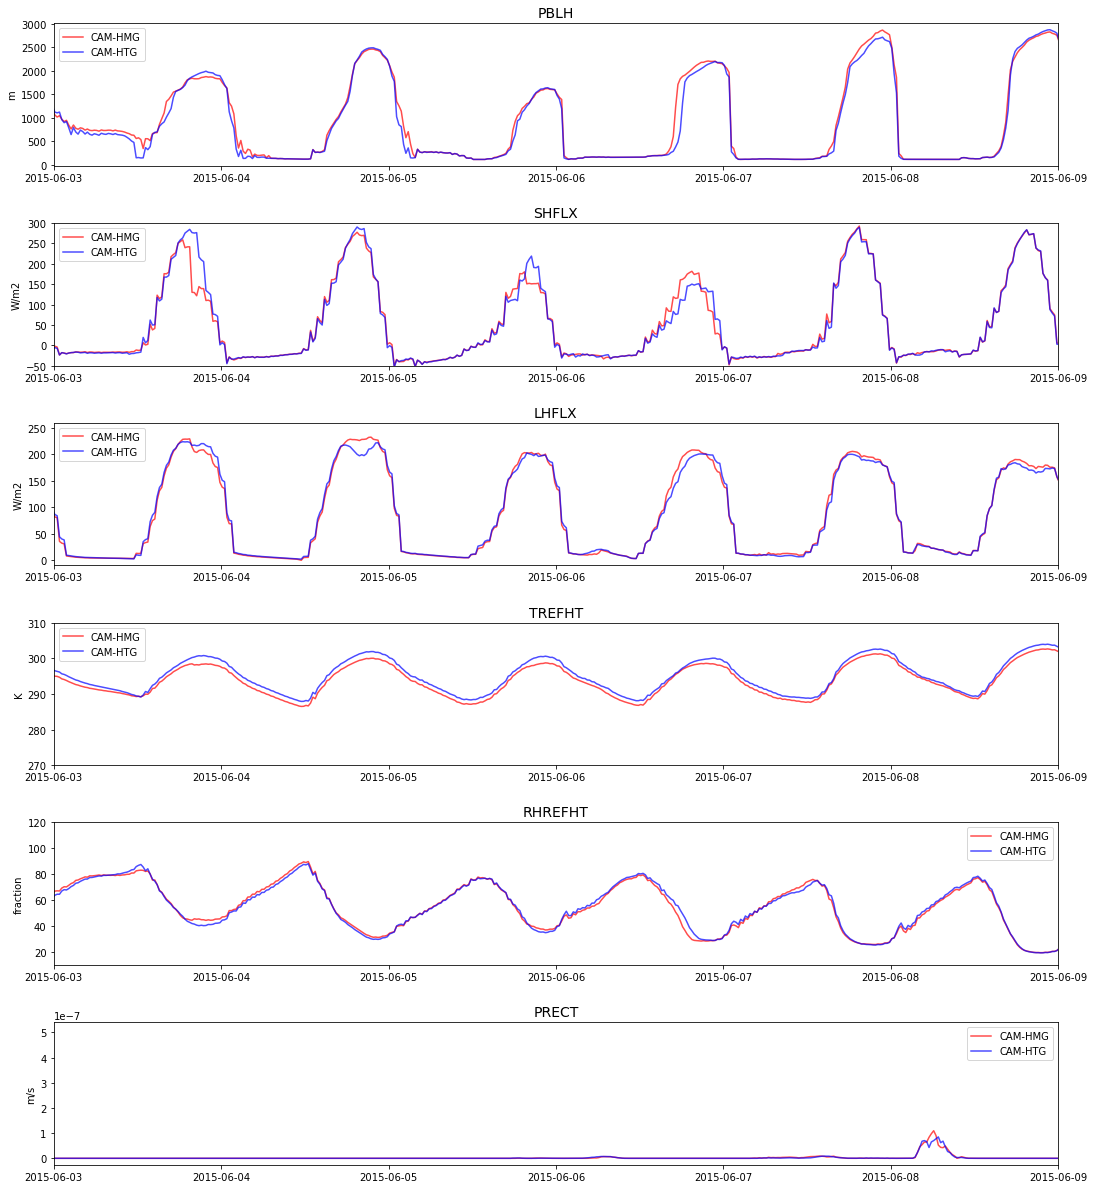

In [6]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])


<b>Test 3:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Now also prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in *FluxMods 


In [3]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2RtpthlpWpthlpWprtpUp2UpwpVpwpWp4_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2RtpthlpWpthlpWprtpUp2UpwpVpwpWp4_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [4]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


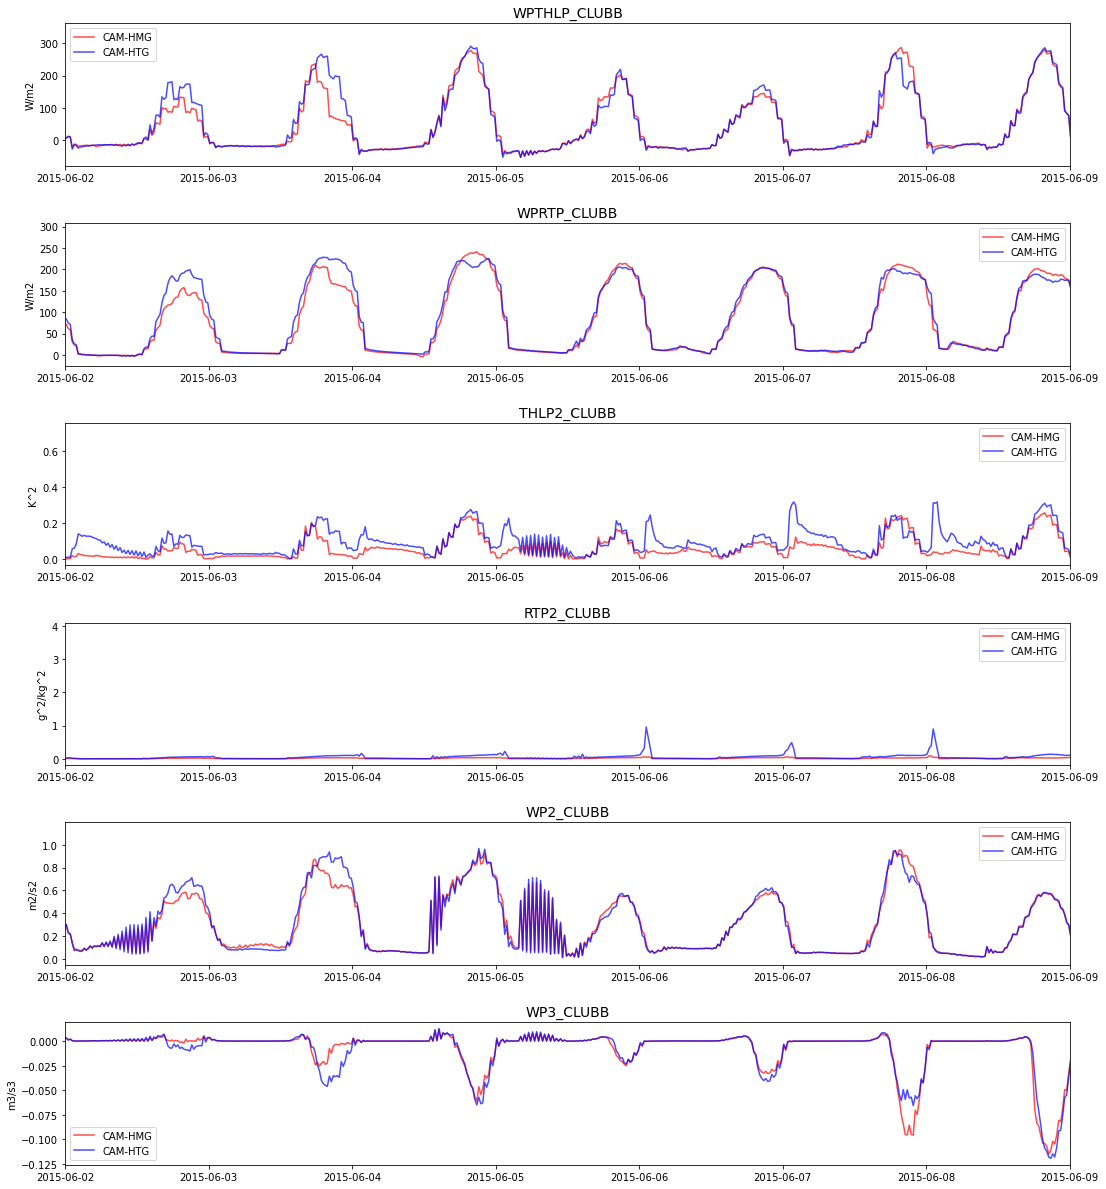

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])
    

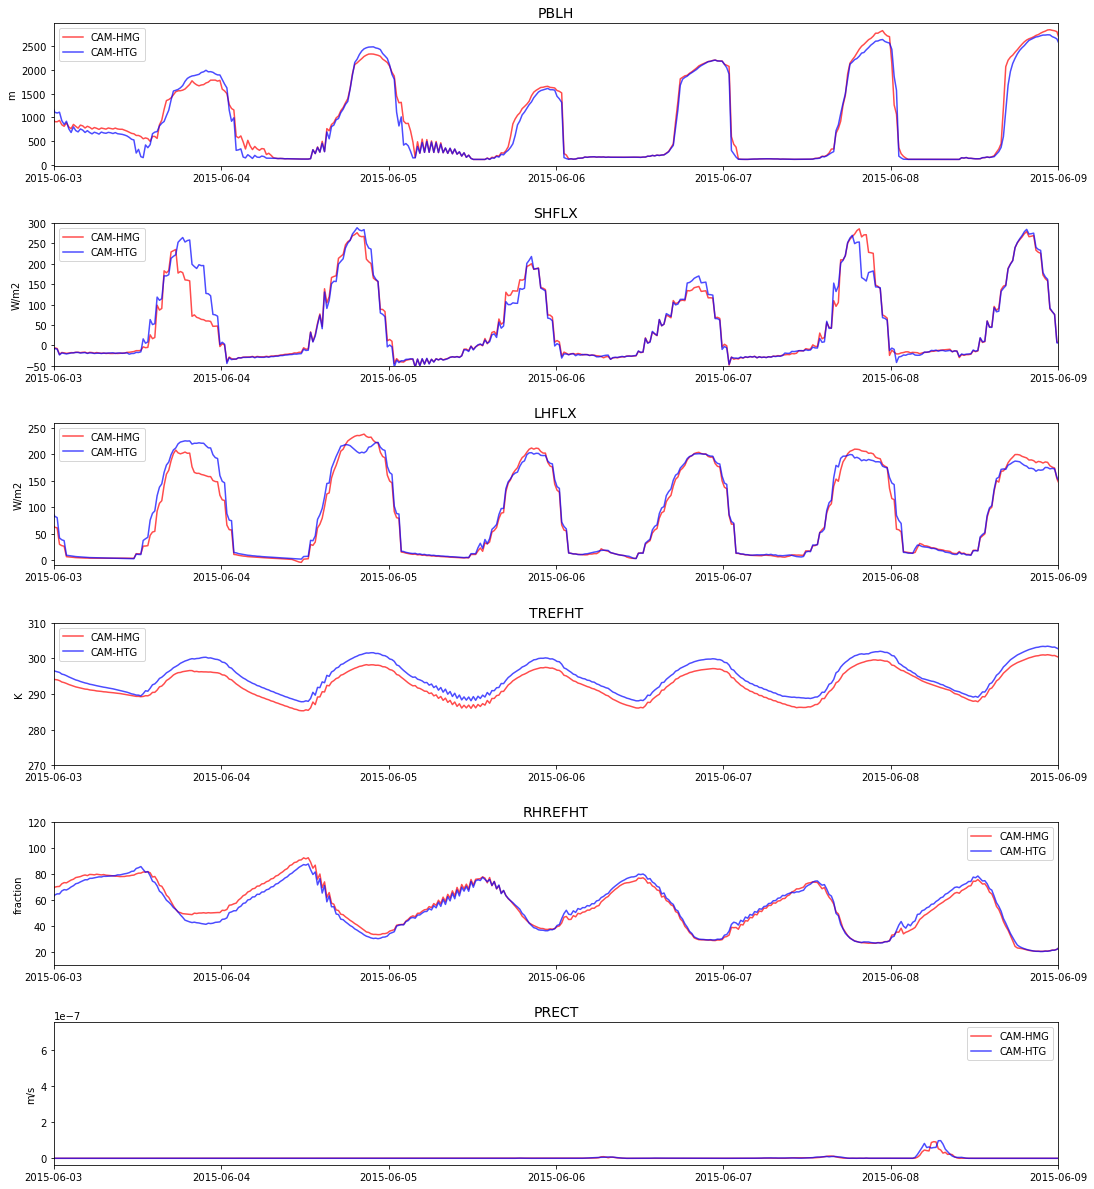

In [6]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 4:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Now also prescribe all the third-order moments (at lev=1)
* Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in *FluxMods 



In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


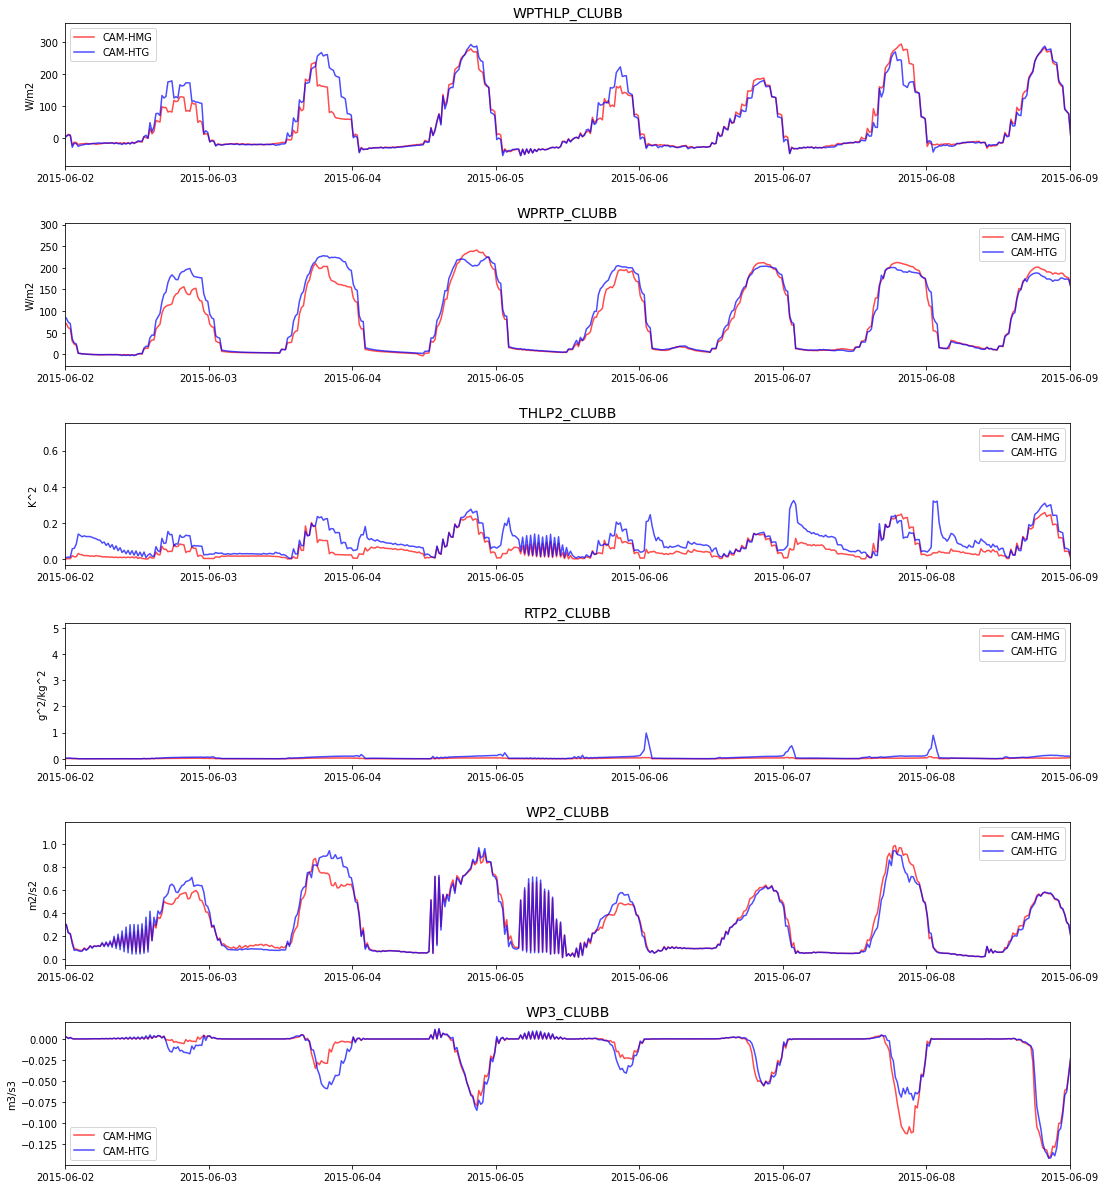

In [4]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])
    

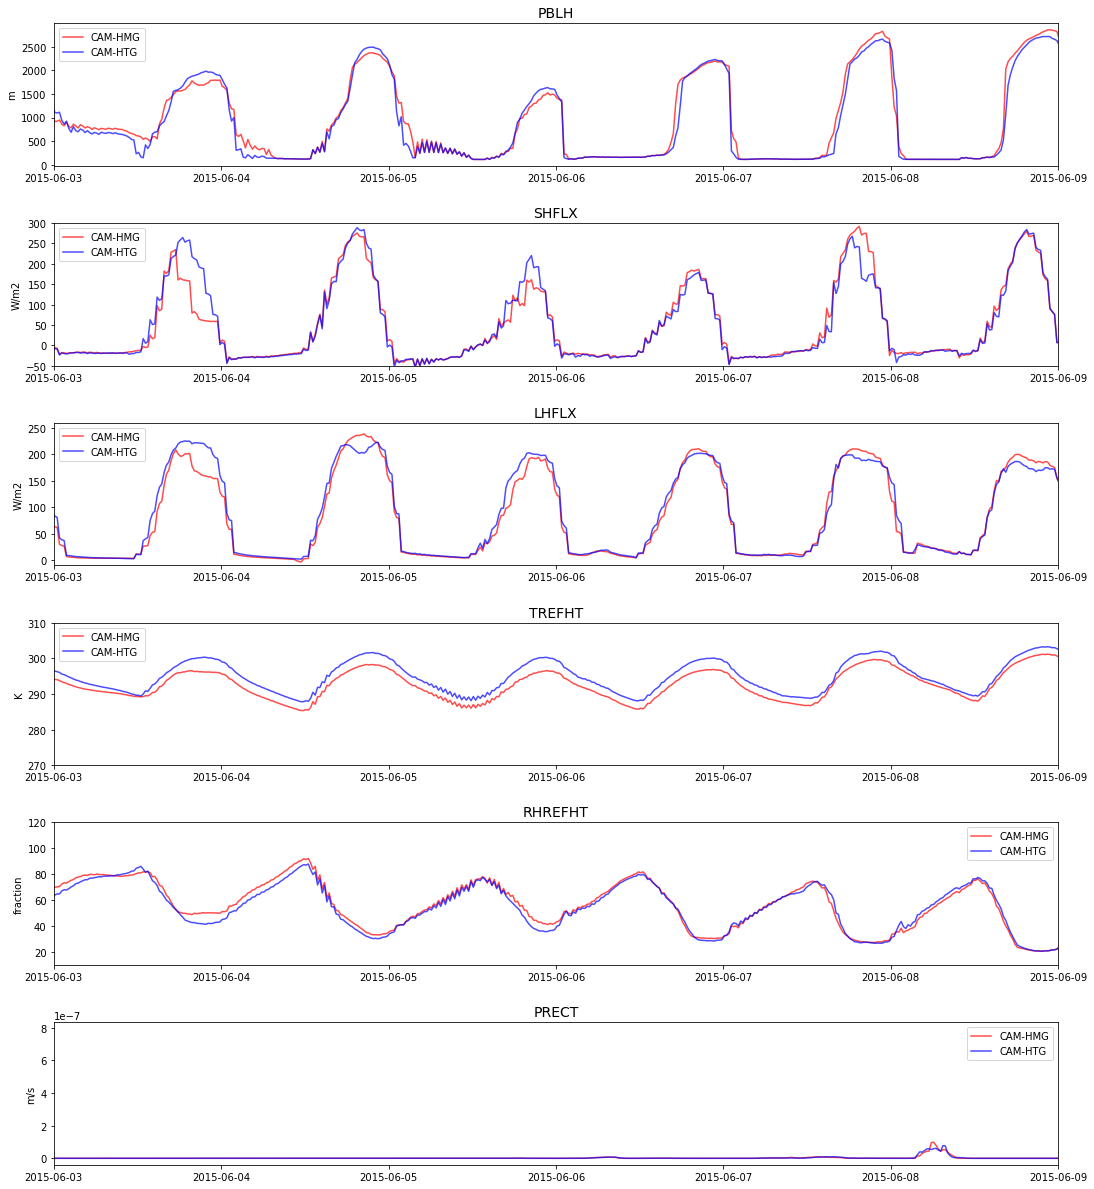

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 5:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in *FluxMods 




In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


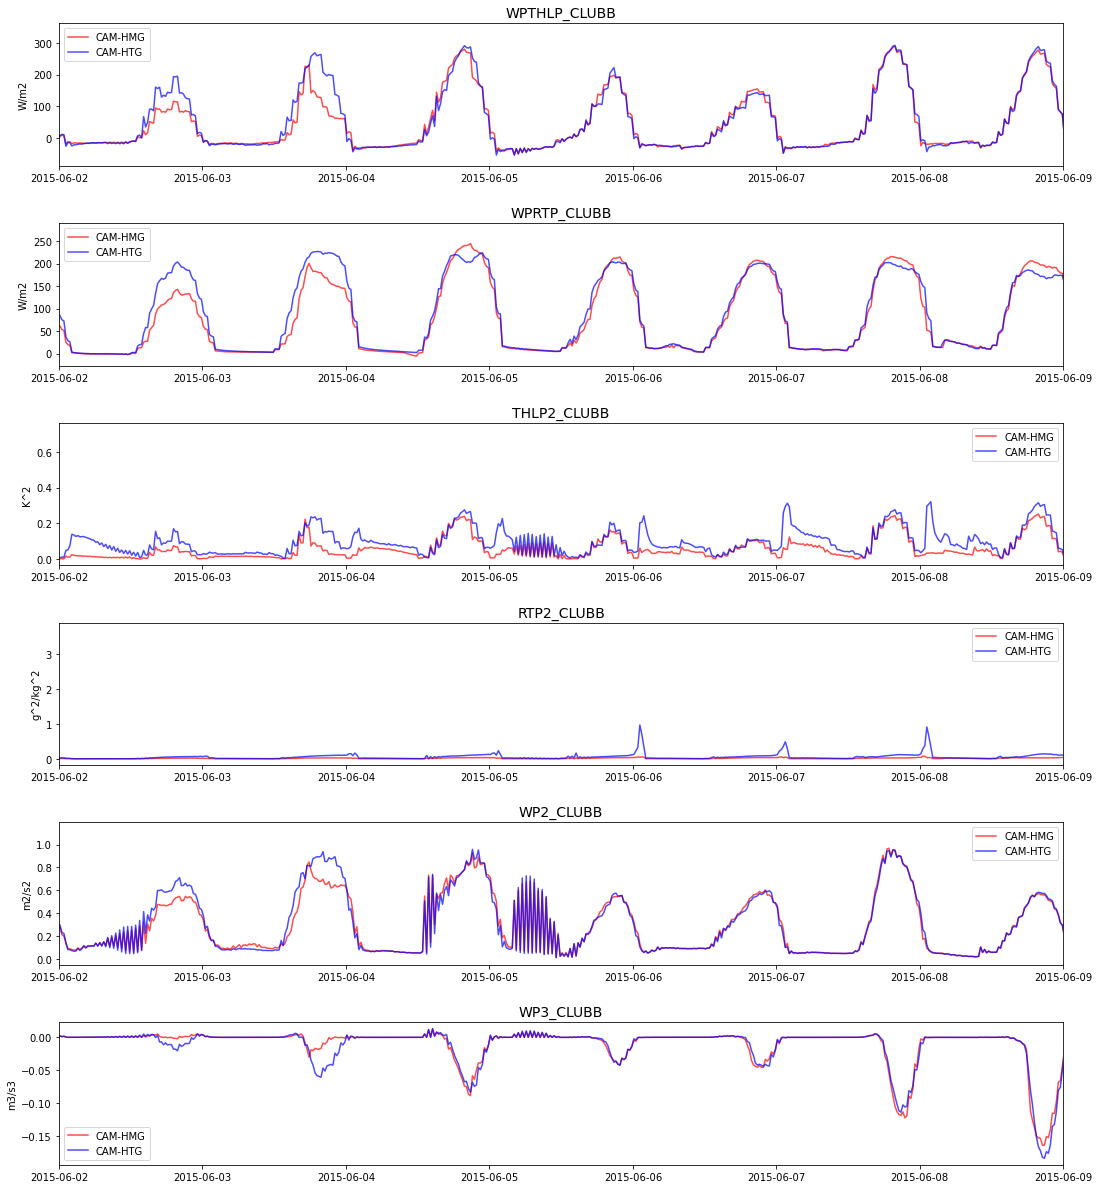

In [4]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])


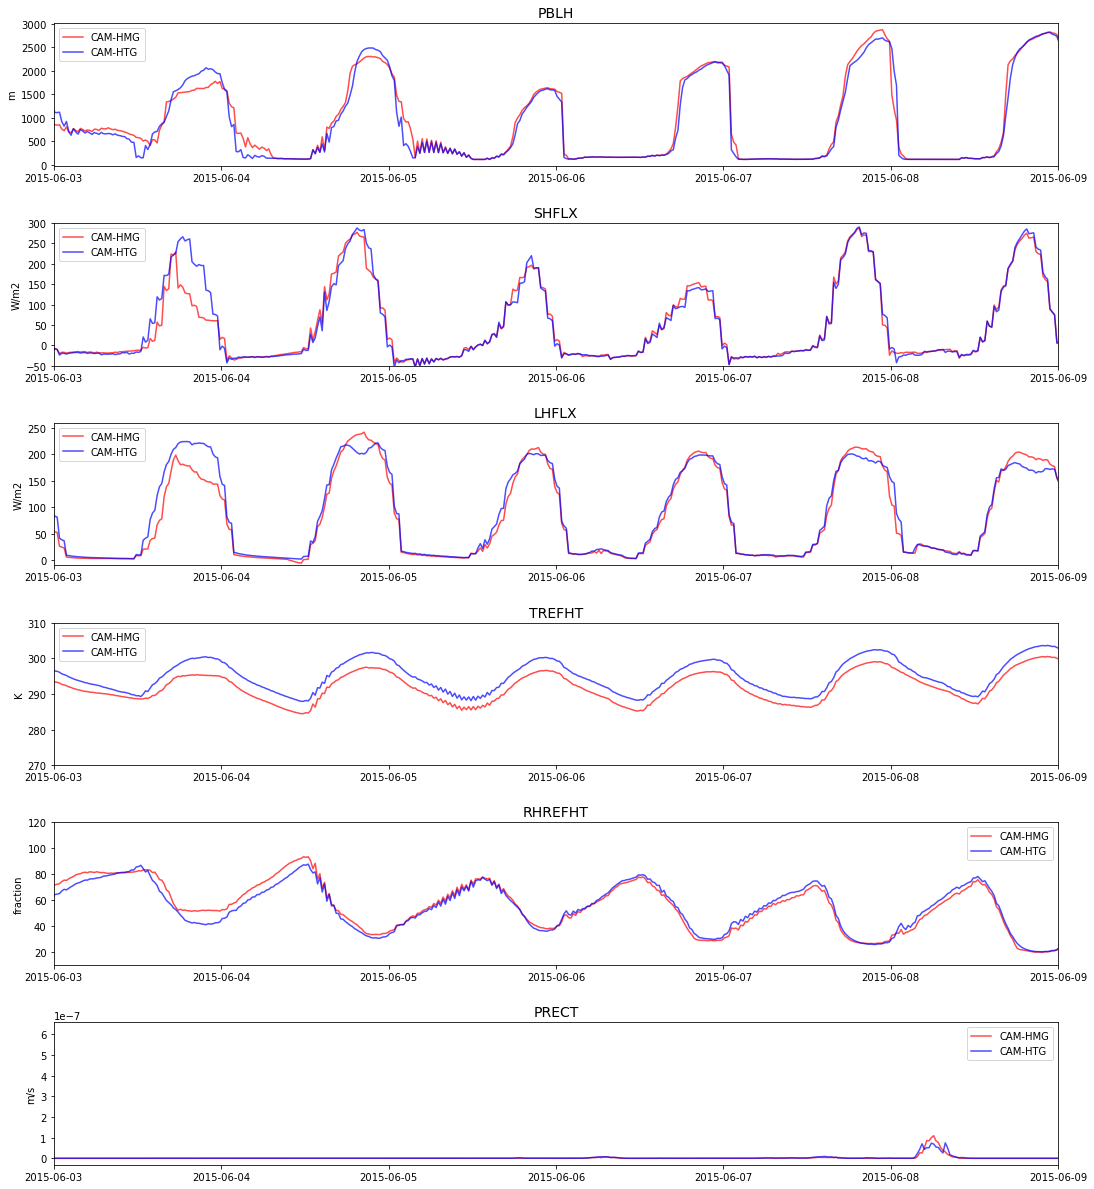

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 6:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Now use the version in CLUBBmomentsMod & other CLM source codes present in CESM_sanity/components/clm.
    * Compute w* in CLUBBmomentsMod, don't set wstar/wc under stable conditions in most *FluxMods, but leave UrbanFluxesMod wc = 0.5 in stable conditions 


In [17]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_noCLMmods_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_noCLMmods_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


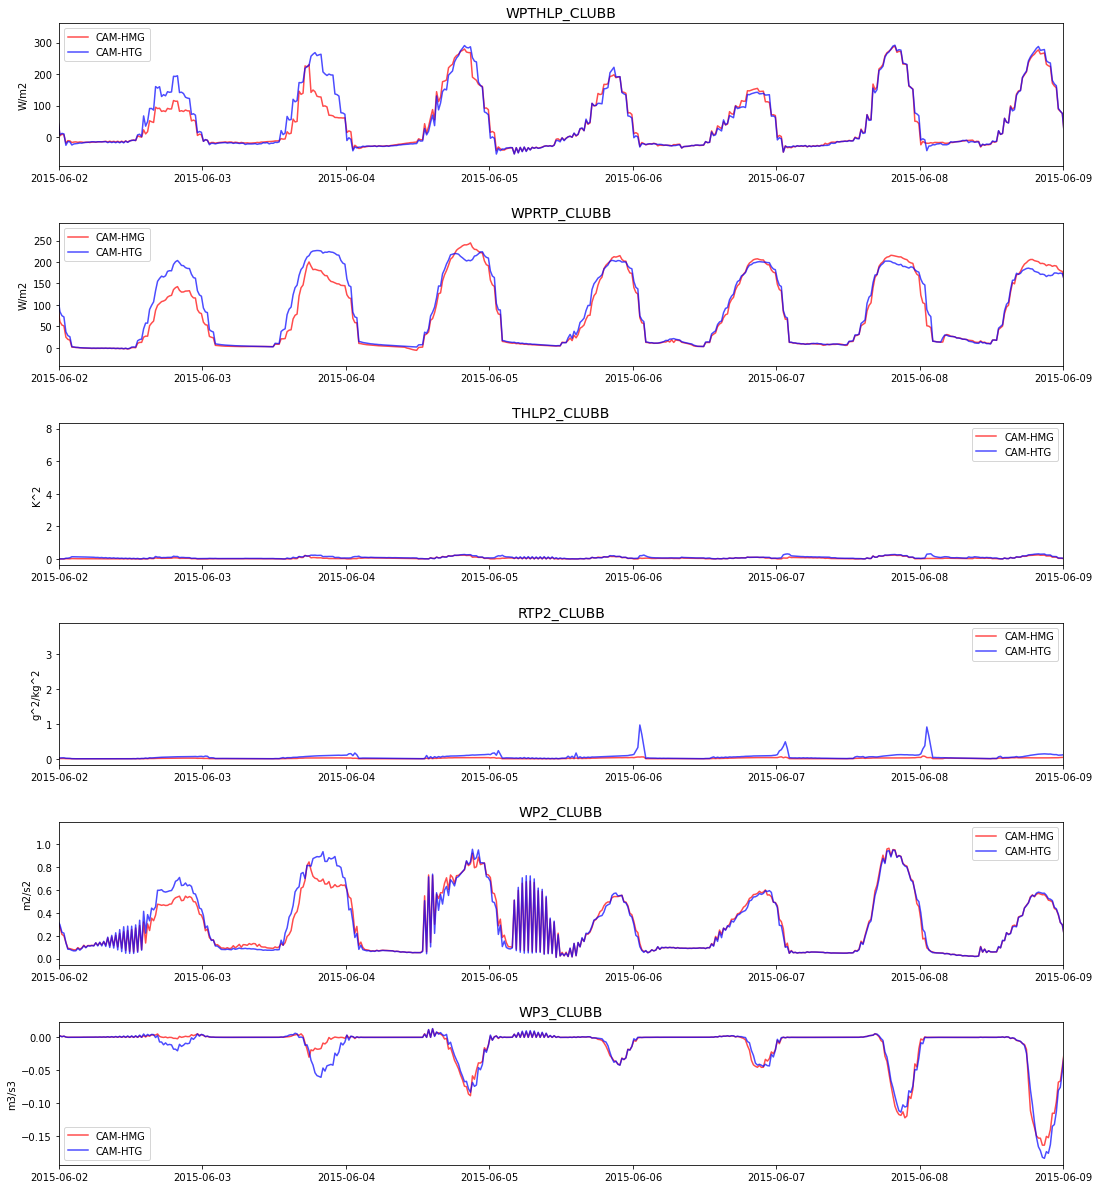

In [18]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])



In [19]:
np.nanmax(HTGcam_DS.WPRTP_CLUBB.values[:,-1,:,:] - HMGcam_DS.WPRTP_CLUBB.values[:,-1,:,:])

68.84805

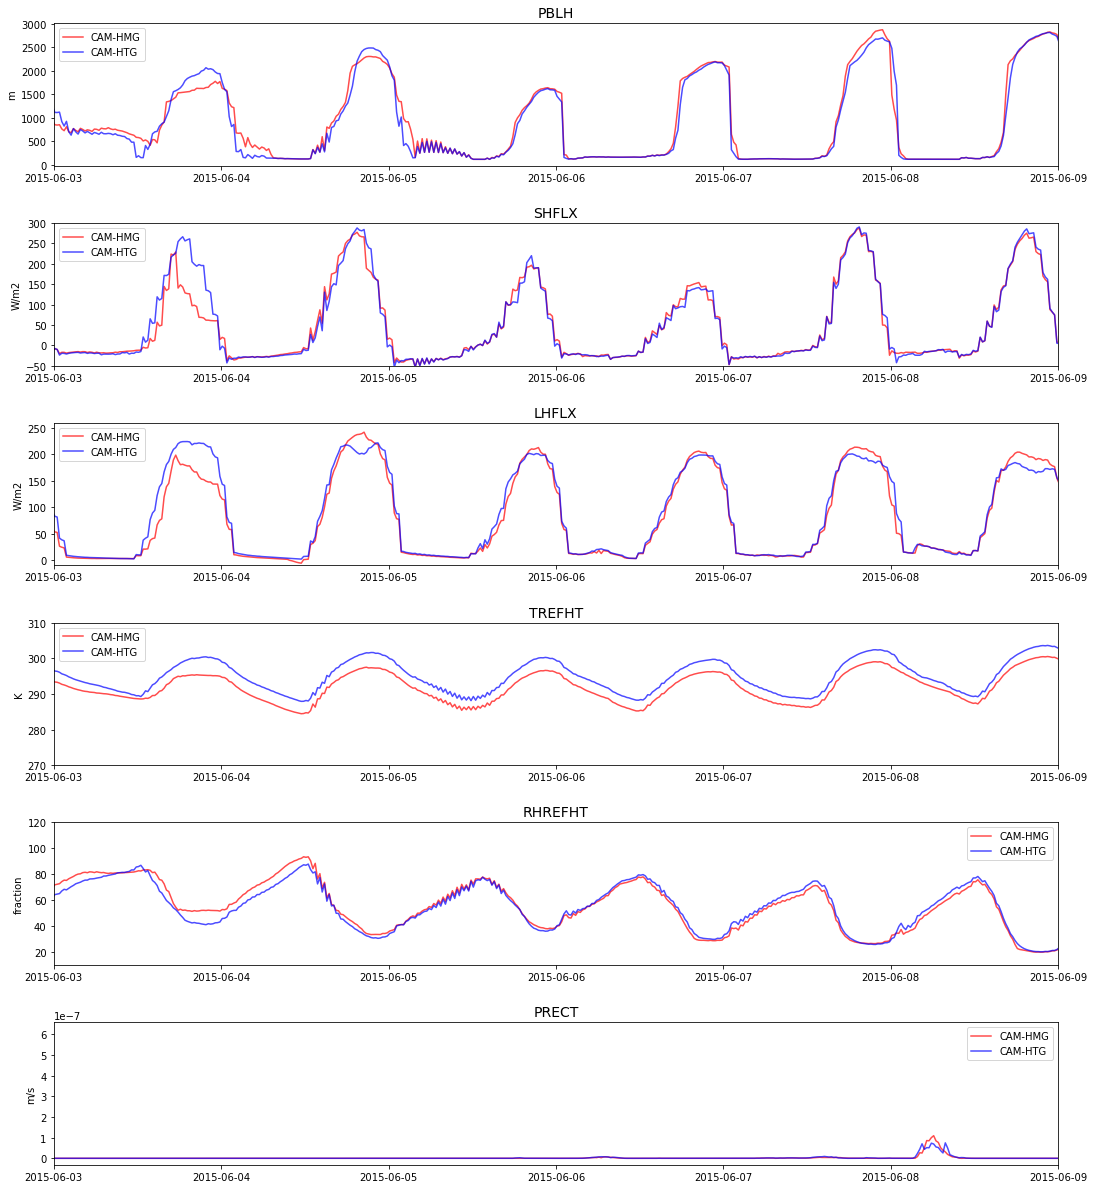

In [20]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 7:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Now use the version in CLUBBmomentsMod for calculating moments, but leave w* set in stable conditions as 0.0 for most FluxMods, only excluding the UrbanFluxMod, where it's defined as wc using the same definition as for unstable conditions. 


In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_setStableWstarInFluxModsAnyway_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_setStableWstarInFluxModsAnyway_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()
    

/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


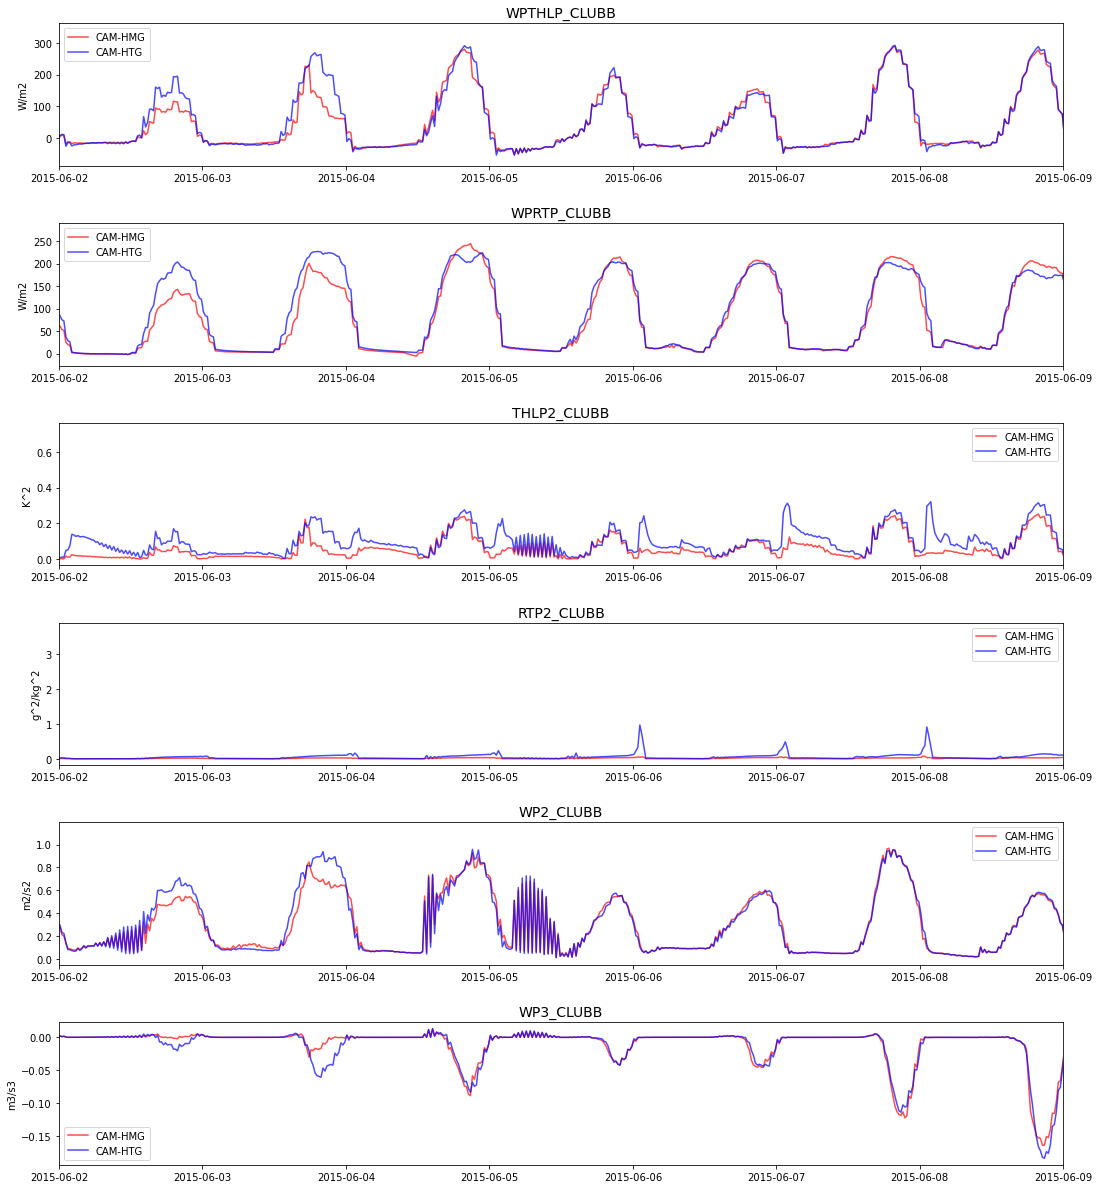

In [4]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])


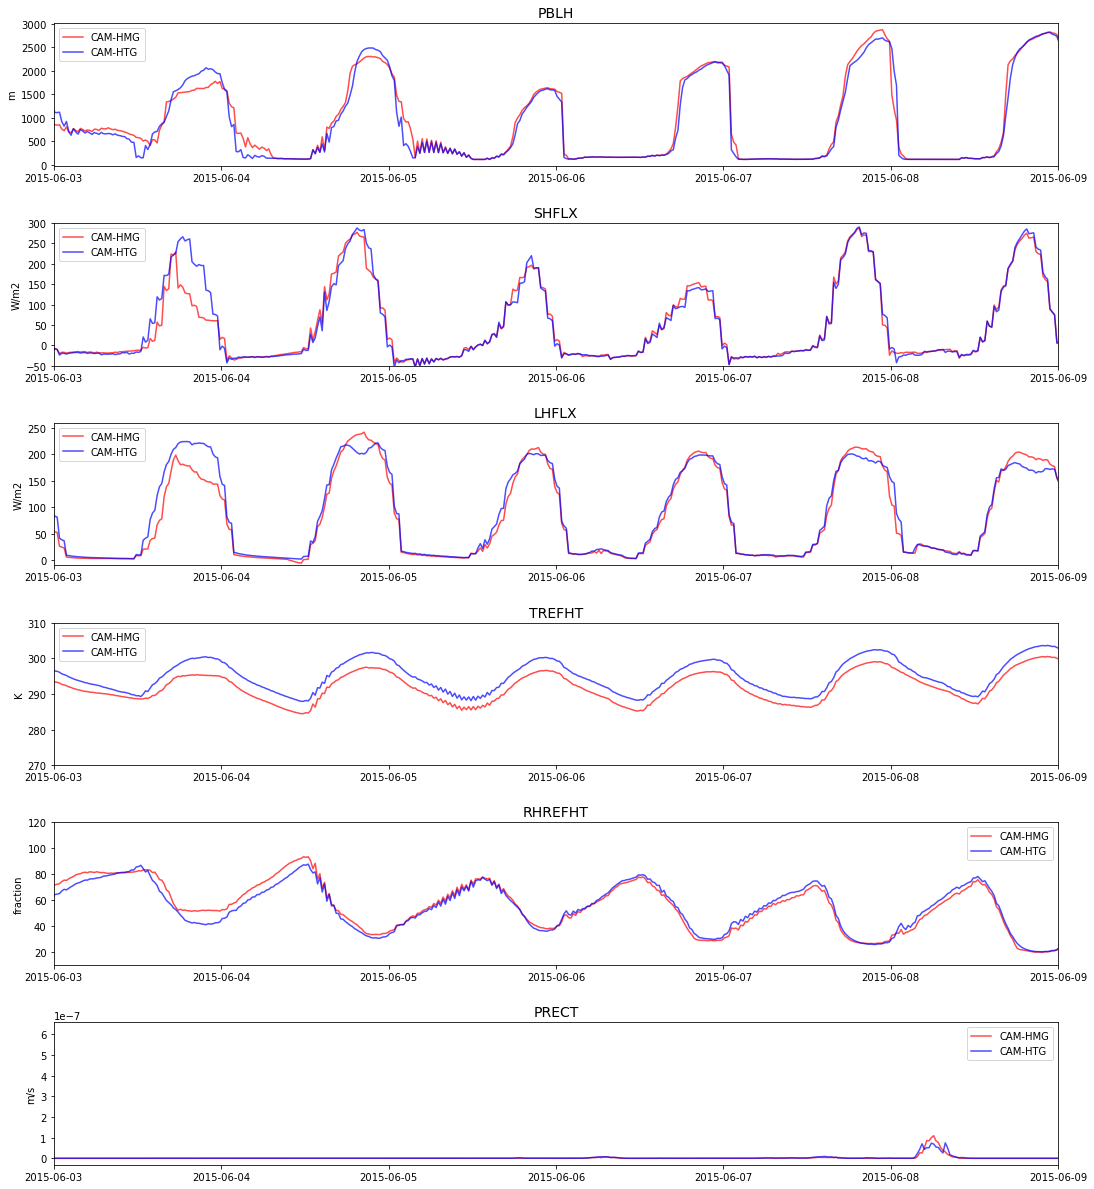

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])

<b>Test 8:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Now use the version in CLUBBmomentsMod for calculating moments and don't include any CLM mods, but revert the branch to tempCLASP  


In [6]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_tempCLASPbranch_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_tempCLASPbranch_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()


/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [7]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


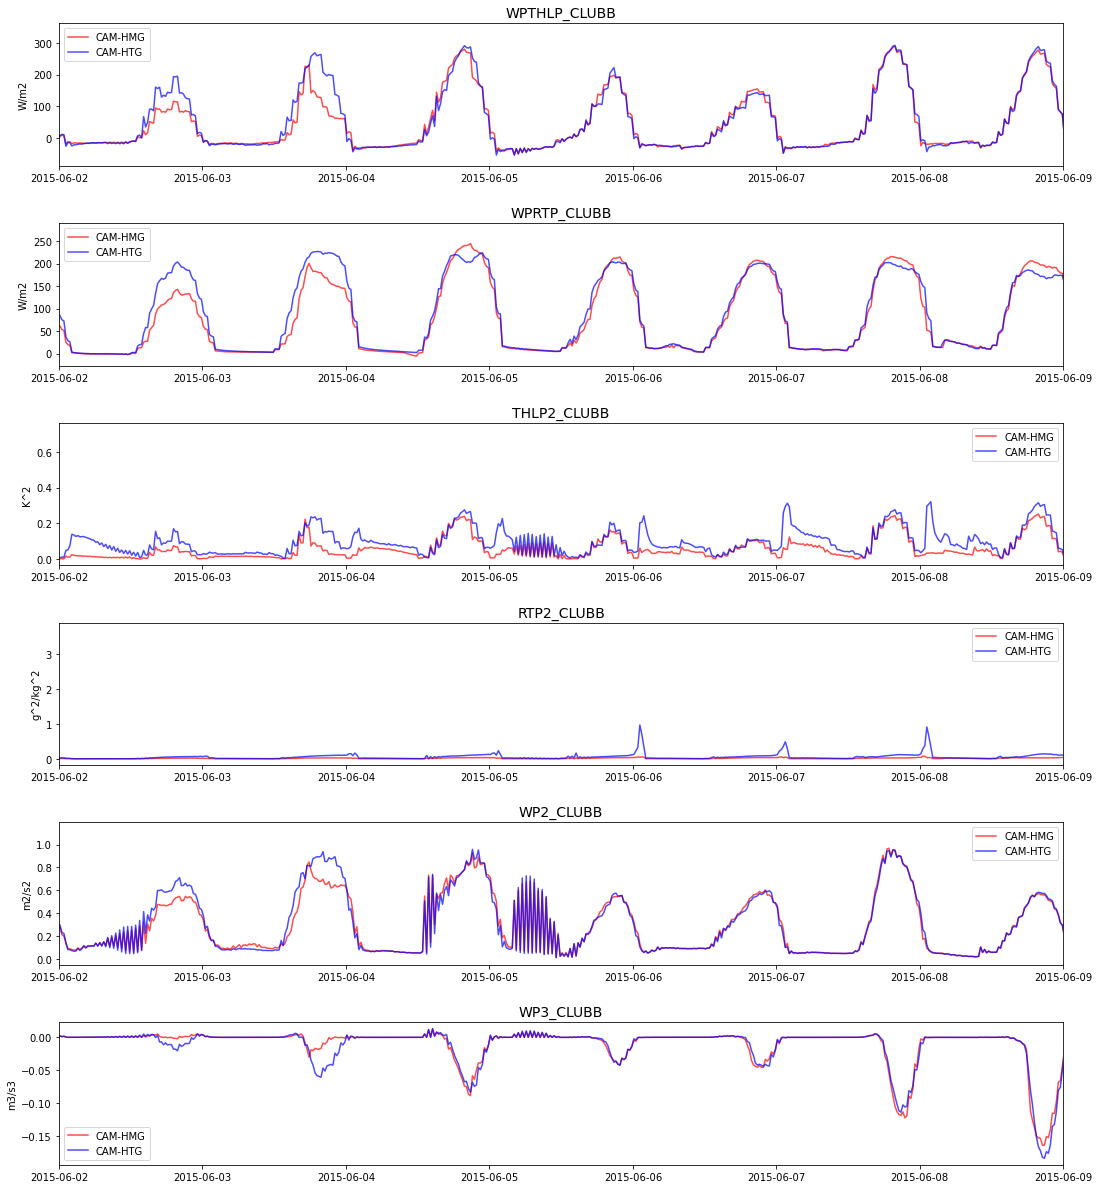

In [8]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])
    

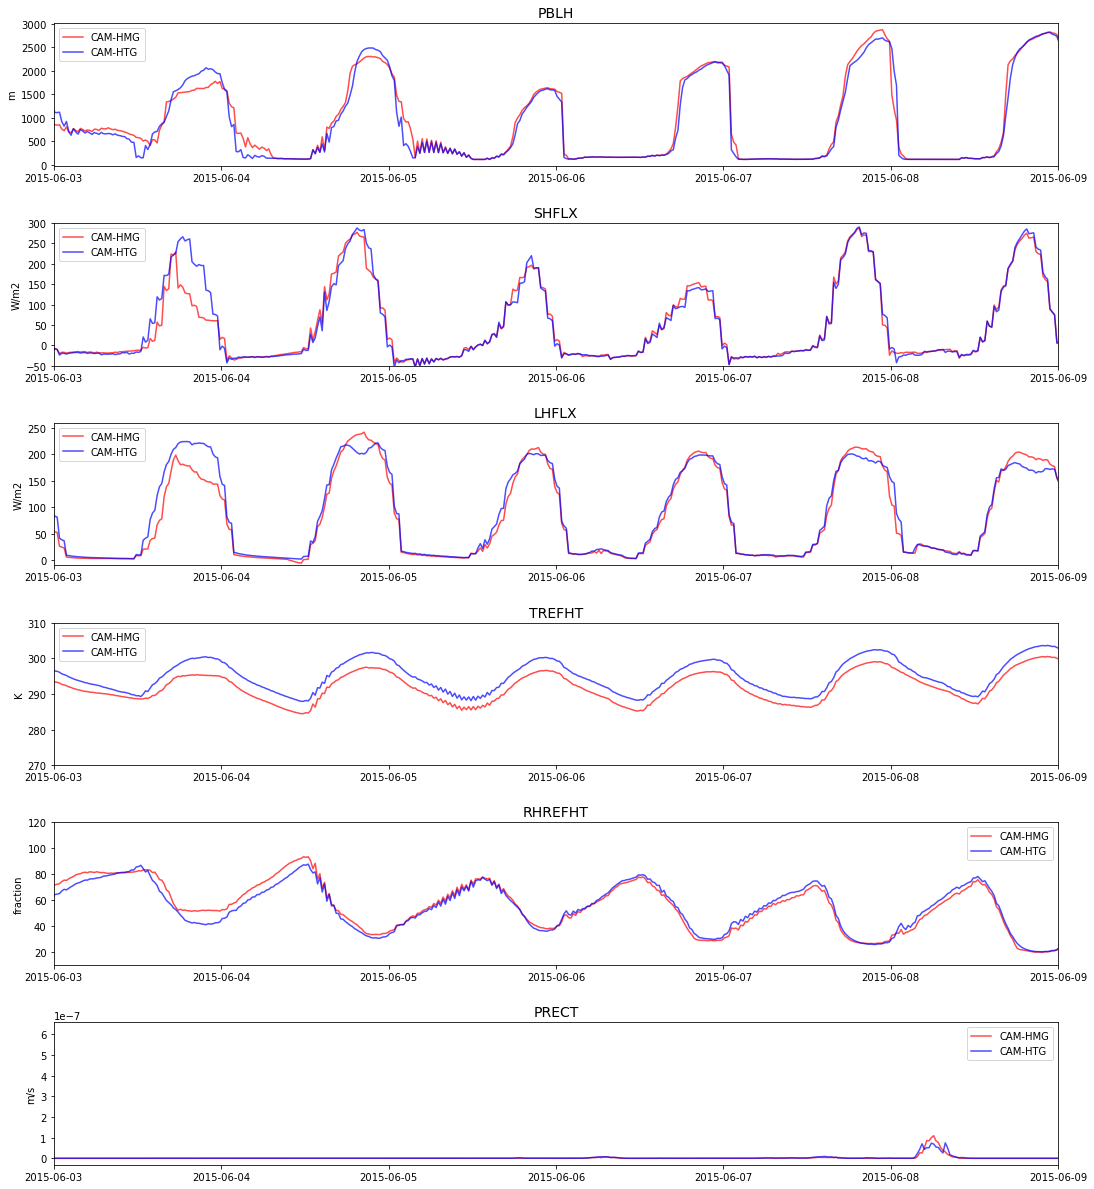

In [9]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 9:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Now use the version in CLUBBmomentsMod for calculating moments and don't include any CLM mods, but revert the branch of CLASP to the commit labeled "New w* fix - compute in CLUBBmomentsMod" (one before most recent)



In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_CLASPrevertBranch78635bc0_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_CLASPrevertBranch78635bc0_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()


/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


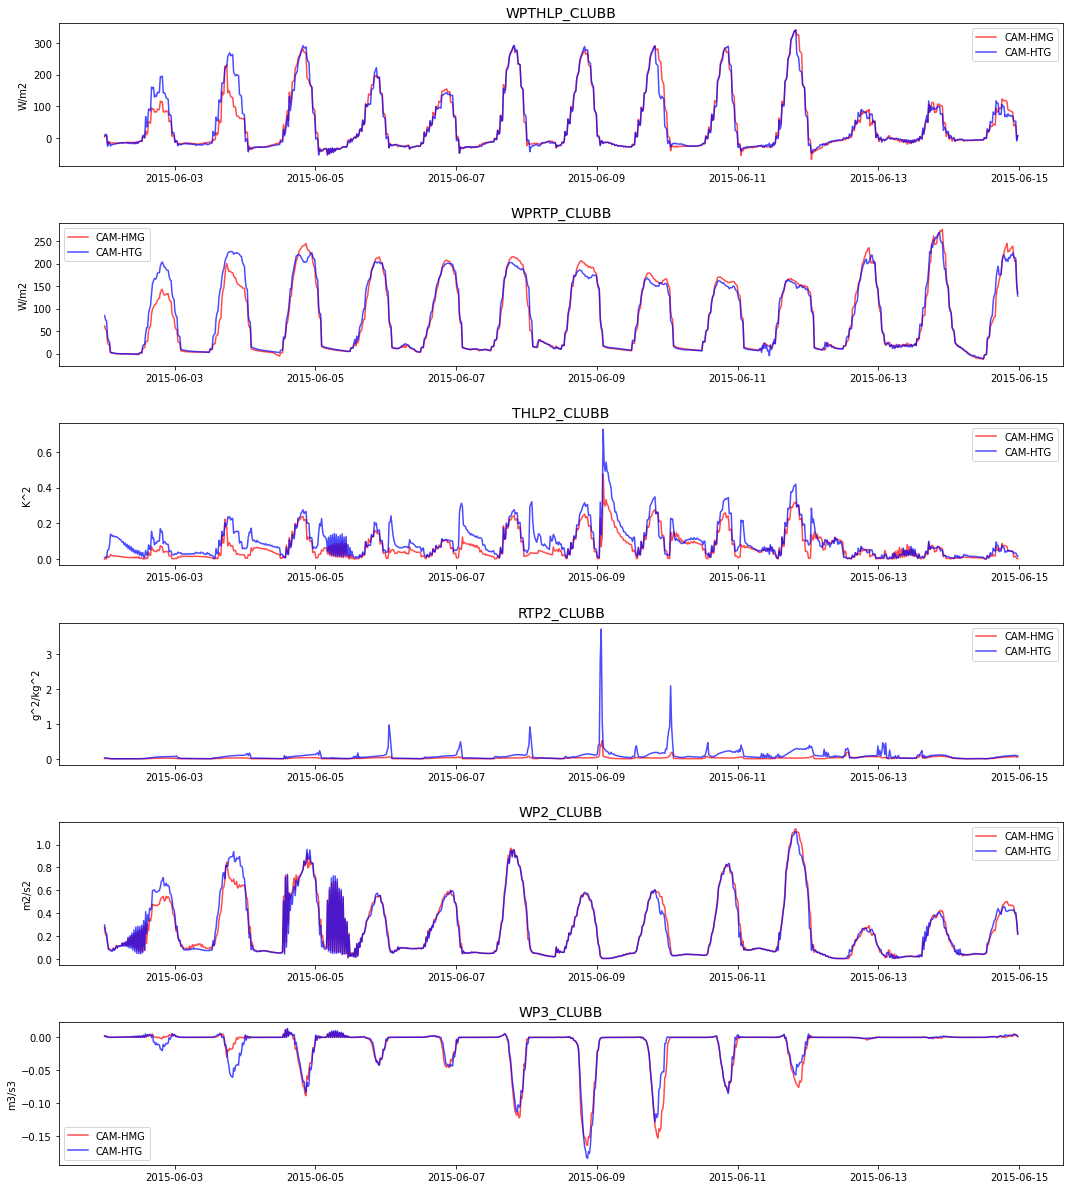

In [7]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
#     axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])
    

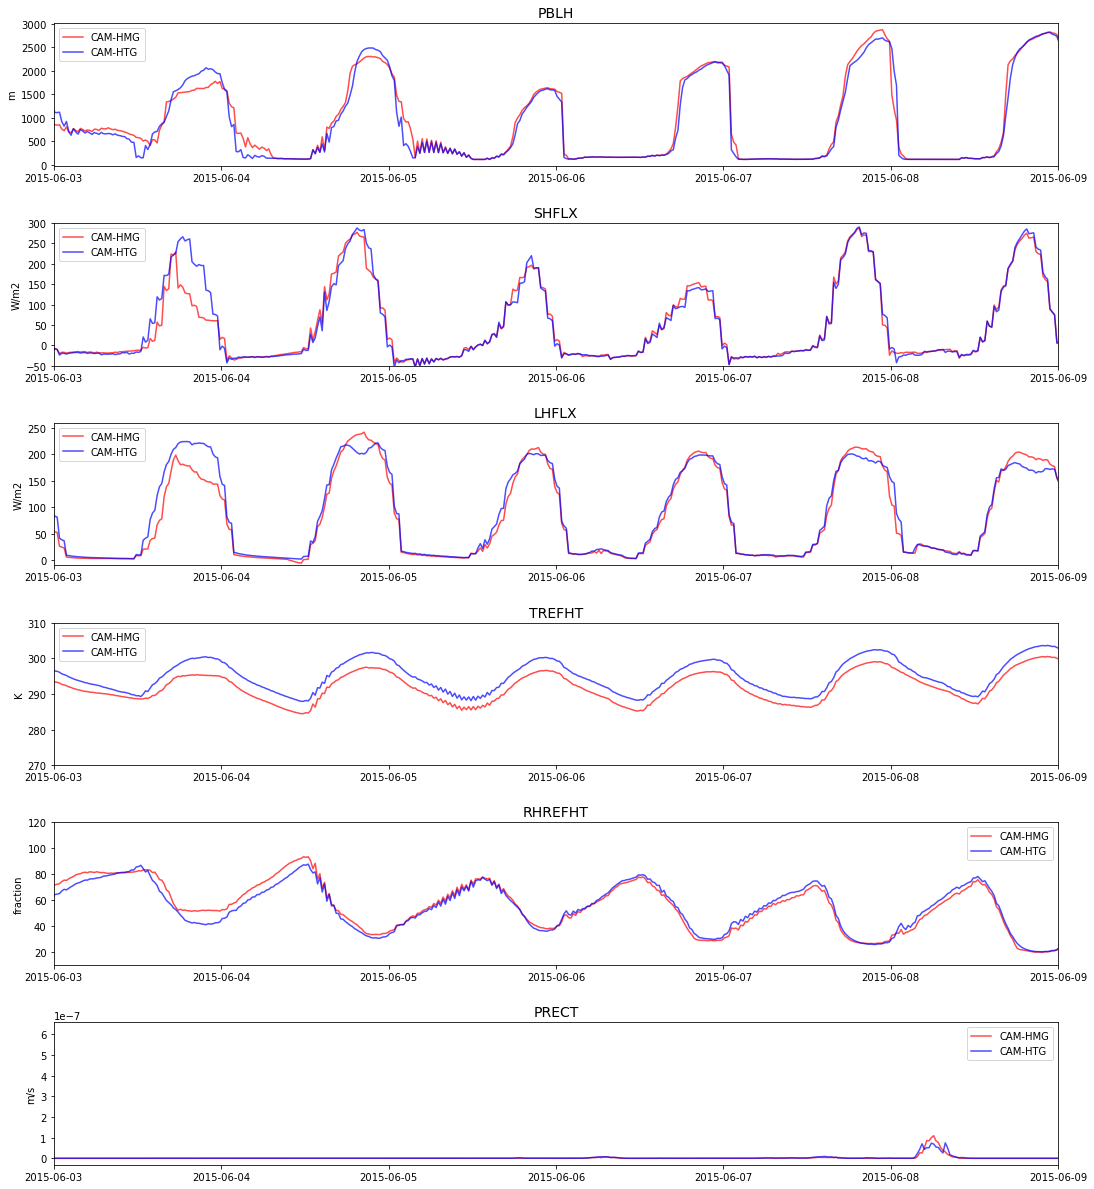

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 10:</b>
* Still prescribe w'2, thl'2, rt'2, and thl'rt' 
* Still prescribe w'thl' and w'rt' in clubb_intr.f90
* Still prescribe even-ordered momentum moments: u'2, u'w',v'w', and w'4 
* Still prescribe all the third-order moments (at lev=1)
* Turn off use_andre in surface_varnce 
* Don't include any CLM mods, but revert the branch of CLASP to the commit labeled "Set w* in stable conditions and add calculation of VP2_CLUBB" (two before most recent). So w*=0 in stable conditions, as set in *FluxMods




In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_CLASPrevertBranch8f0685674d0_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_noUseAndre_CLASPrevertBranch8f0685674d0_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()



/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


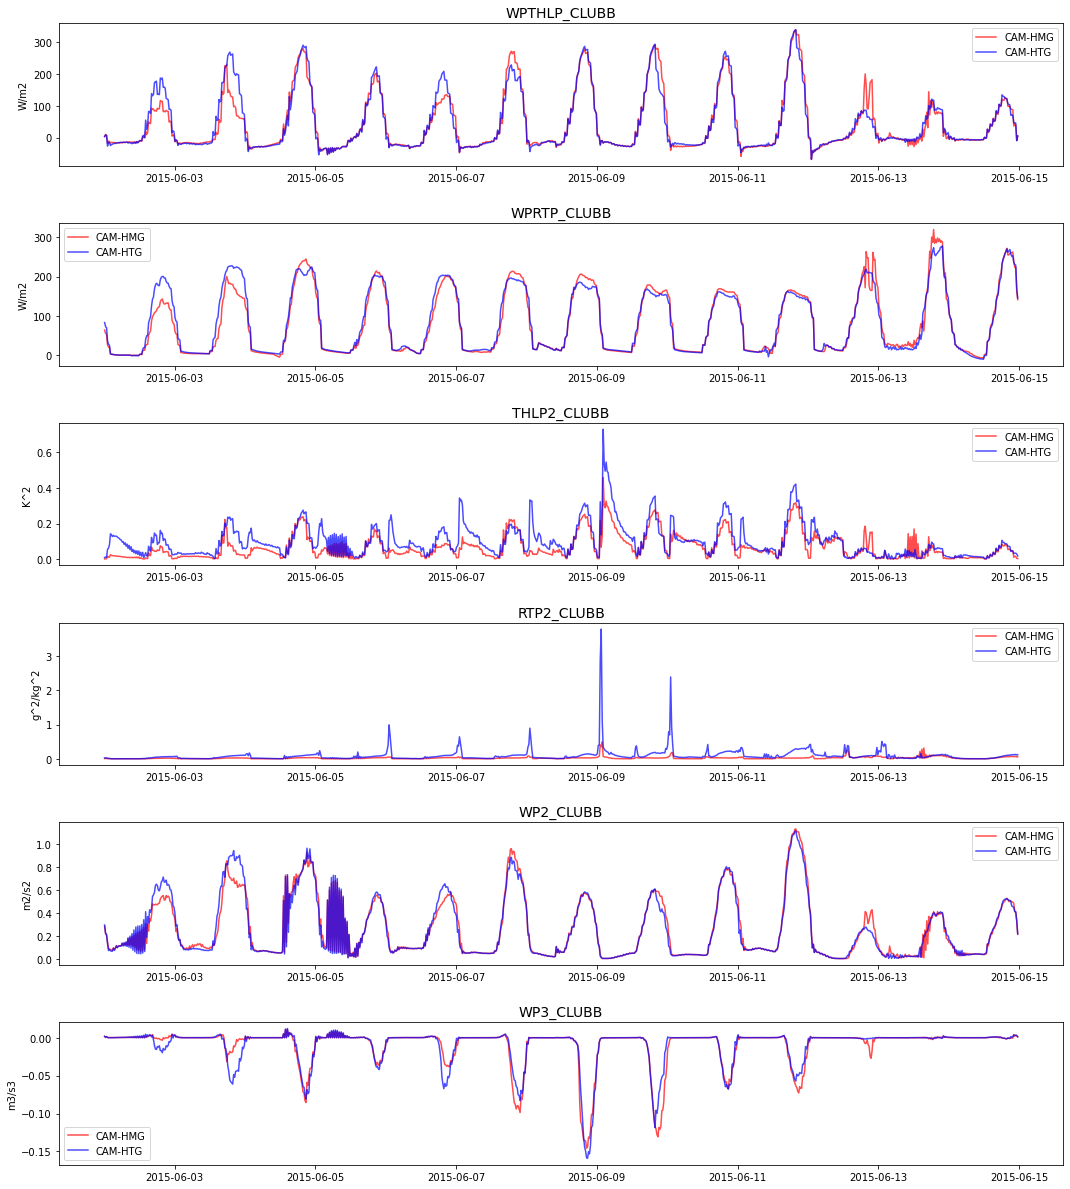

In [4]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
#     axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])


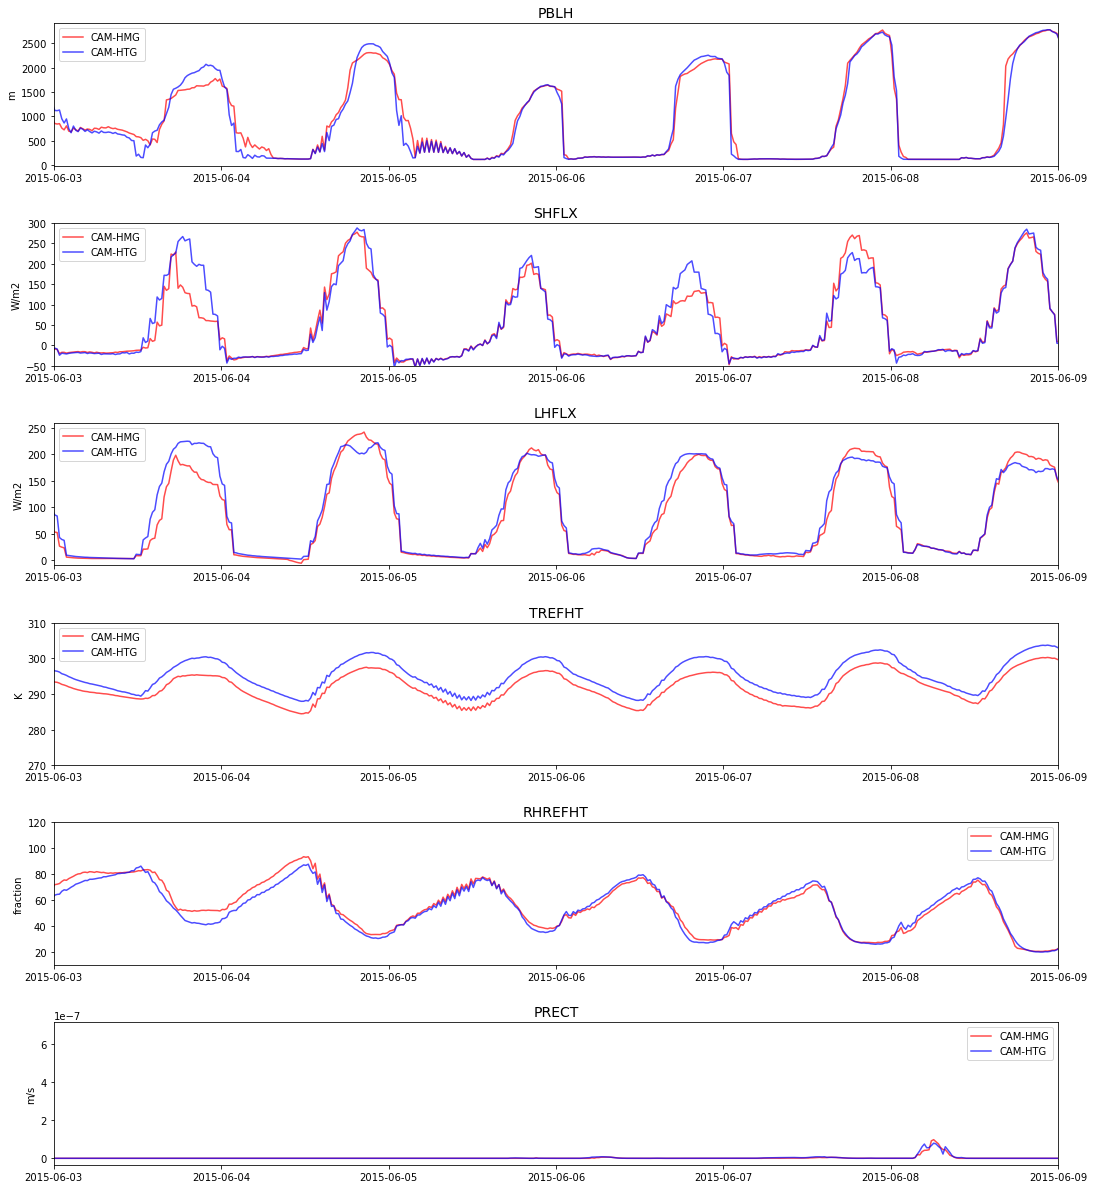

In [5]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

<b>Test 11:</b>
* Revert the branch of CLASP to the commit labeled "Removed (-)ve on u'w' and v'w'" (three before most recent).
* Then use the exact Src.clm and Src.cam files that were used in the first WSTARdefineInCLUBBmomentsMods case, where the moments were definitely identical. 
* This is the last shot I have. Otherwise, I had an error in how I was passing things through to the coupler (I think the number fo arguments I was telling it to expect was too low), and so things weren't passing through quite right. 



In [2]:
dataDir = '~/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/wstar_tests/'

atmName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_copyWSTARdefineInCLUBBmomentsMods_wstarInCLUBBmoments.HMG.001.cam.h0.2015-05-31-84585.nc'
atmName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.AllMomentsPrescribed_copyWSTARdefineInCLUBBmomentsMods_wstarInCLUBBmoments.HTG.001.cam.h0.2015-05-31-84585.nc'

# lndName_hmg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HMG.001.clm2.h0.2015-05-31-84585.nc'
# lndName_htg = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_TestingWstar.onlyWp2Thlp2Rtp2Rtpthlp_wstarInCLUBBmoments.HTG.001.clm2.h0.2015-05-31-84585.nc'

with xr.open_dataset(atmName_hmg, decode_times=True) as HMGcam_DS:
    HMGcam_DS['time'] = HMGcam_DS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(atmName_htg, decode_times=True) as HTGcam_DS:
    HTGcam_DS['time'] = HTGcam_DS.indexes['time'].to_datetimeindex()

# with xr.open_dataset(lndName_hmg, decode_times=True) as HMGclm_DS:
#     HMGclm_DS['time'] = HMGclm_DS.indexes['time'].to_datetimeindex()
    
# with xr.open_dataset(lndName_htg, decode_times=True) as HTGclm_DS:
#     HTGclm_DS['time'] = HTGclm_DS.indexes['time'].to_datetimeindex()



/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  # Remove the CWD from sys.path while we load stuff.
/Users/mdfowler/opt/anaconda3/envs/lens-py/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  del sys.path[0]


In [3]:
## Discard the first 2 days... 
iTimeStart   = np.where(HMGcam_DS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr      = np.arange(iTimeStart[0], len(HMGcam_DS.time.values))

HTGcam_DS = HTGcam_DS.isel(time=timeArr)
# HTGclm_DS = HTGclm_DS.isel(time=timeArr)

HMGcam_DS = HMGcam_DS.isel(time=timeArr)
# HMGclm_DS = HMGclm_DS.isel(time=timeArr)


In [6]:
np.nanmin(HTGcam_DS.WPRTP_CLUBB.values[:,-1,:,:])

0.0

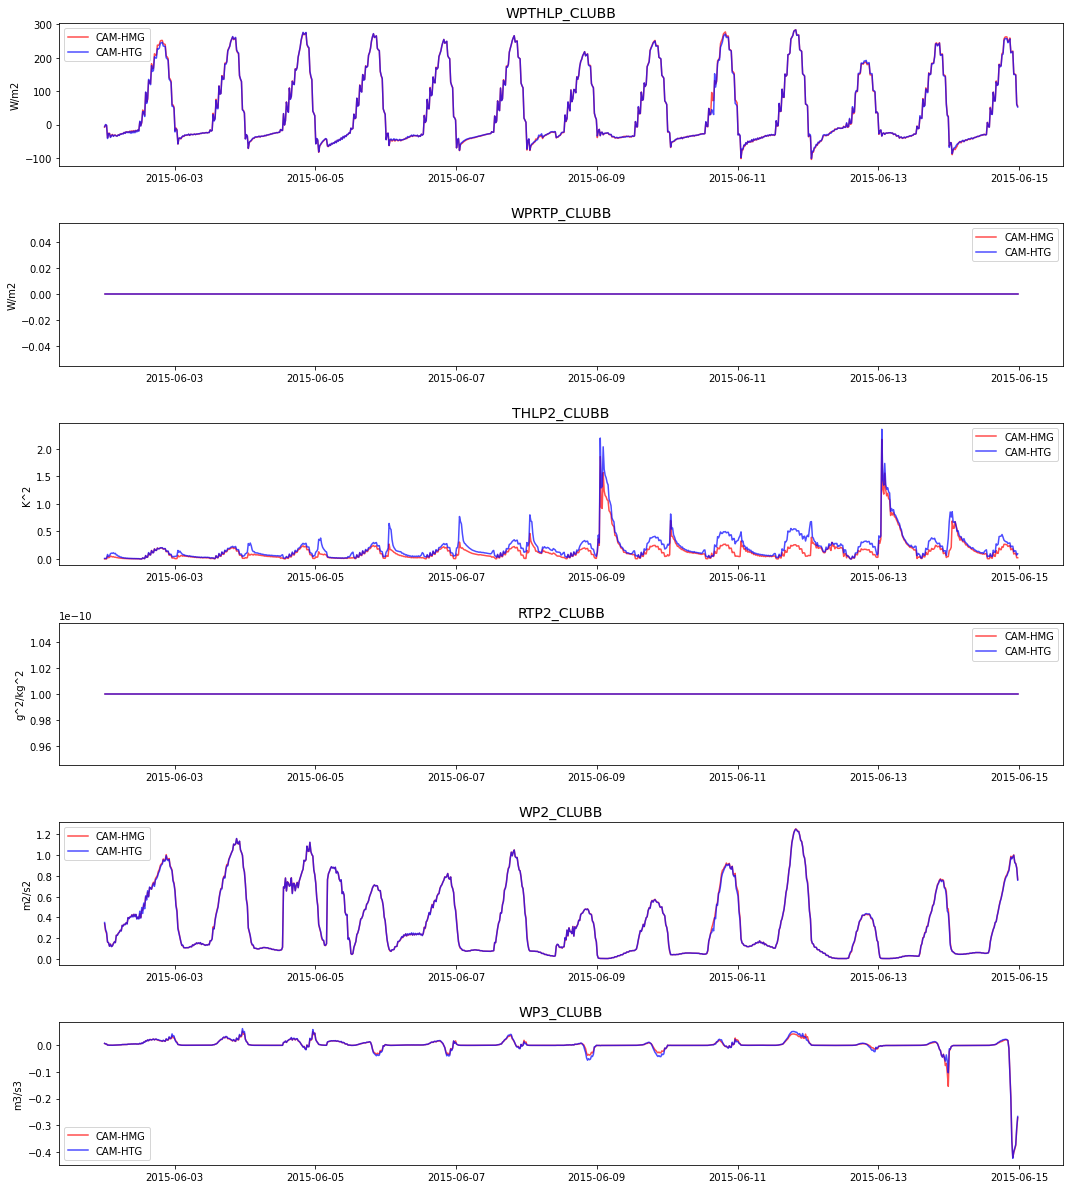

In [4]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB','WP2_CLUBB','WP3_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    if ATM_varNames[iVar]=='WP3_CLUBB':
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-2],
                  'b-', alpha=0.7, label='CAM-HTG')
    else: 
        axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'r-', alpha=0.7, label='CAM-HMG')
        axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values)[:,-1],
                      'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
#     axs[iVar].set_xlim([datetime.date(2015,6,2), datetime.date(2015,6,9)])



In [ ]:
fig,axs = plt.subplots(6,1, figsize=(18,21))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
        
    axs[iVar].plot(HMGcam_DS['time'].values, np.squeeze(HMGcam_DS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.7, label='CAM-HMG')
    axs[iVar].plot(HTGcam_DS['time'].values, np.squeeze(HTGcam_DS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.7, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HTGcam_DS[ATM_varNames[iVar]].units)
    axs[iVar].legend()
    axs[iVar].set_xlim([datetime.date(2015,6,3), datetime.date(2015,6,9)])

    if ATM_varNames[iVar]=='SHFLX':
        axs[iVar].set_ylim([-50,300])
    elif ATM_varNames[iVar]=='LHFLX':
        axs[iVar].set_ylim([-10,260])
    elif ATM_varNames[iVar]=='TREFHT':
        axs[iVar].set_ylim([270,310])
    elif ATM_varNames[iVar]=='RHREFHT':
        axs[iVar].set_ylim([10,120])
        

## IOP locations? 
Based on Table 1 in Gettelman et al. (2019)

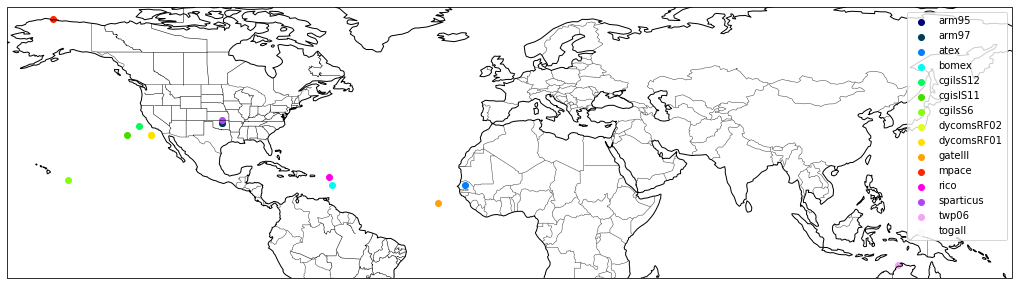

In [36]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util

fig, ax1 = plt.subplots(1,1, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})

# Set up maps: extent
# ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)
ax1.coastlines()


lat = np.asarray([36,36,15,15,35,32,17,32,32,9,71,18,37,-12,-2])
lon = np.asarray([263,263,345,300,235,231,211,239,239,336,206,299,263,131,154])
name = np.asarray(['arm95','arm97','atex','bomex','cgilsS12','cgislS11','cgilsS6','dycomsRF02','dycomsRF01','gateIII',
                   'mpace','rico','sparticus','twp06','togaII'])

n = len(lat)
colors = plt.cm.gist_ncar(np.linspace(0,1,n))

for iIOP in range(len(lat)):
    ax1.scatter(lon[iIOP], lat[iIOP],color=colors[iIOP], 
                transform=ccrs.PlateCarree(),
                label=name[iIOP])
ax1.legend()

